In [3]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [4]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()

import feature_extractor



In [5]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx

import pickle


/cluster/scratch/bdayan/GIRG_data/socfb-American75.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UConn.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Brandeis99.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Duke14.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Indiana69.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Georgetown15.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UC64.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UChicago30.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-FSU53.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Tennessee95.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-WashU32.SpaceOne
/cluster/s

In [6]:
## NB numpy version was 1.19.5. Was not working so upgraded to 1.20.0
import grakel

In [7]:
np.__version__

'1.24.4'

In [8]:
import importlib
importlib.reload(mcmc)

<module 'benji_girgs.mcmc' from '../benji_girgs/mcmc.py'>

In [19]:
n = 3000
d=2
tau=2.5
alpha=1.5
desiredAvgDegree= 20.0

def gen_girg():
    g, edges, weights, pts, const = generation.generate_GIRG_nk(
        n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsTorus2)
    return g

g = gen_girg()

# g = generation.chung_lu_mixin_graph(g, weights, 0.5)
g = utils.get_largest_component(g)
nk.overview(g)
# n = g.numberOfNodes()


gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
# g_gk = grakel.Graph(A)
g_gk = grakel.Graph(A, node_labels={v: g.degree(v) for v in g.iterNodes()})

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


Network Properties:
nodes, edges			2999, 29913
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.006654
clustering coefficient		0.439671
min/max/avg degree		1, 644, 19.948650
degree assortativity		-0.083167
number of connected components	1
size of largest component	2999 (100.00 %)


In [20]:
g_cl1 = generation.fit_chung_lu(g, seed=1)
g_cl2 = generation.fit_chung_lu(g, seed=2)

In [21]:
nk.overview(g_cl1)

Network Properties:
nodes, edges			2999, 29755
directed?			False
weighted?			False
isolated nodes			8
self-loops			0
density				0.006619
clustering coefficient		0.081097
min/max/avg degree		0, 652, 19.843281
degree assortativity		0.331674
number of connected components	9
size of largest component	2991 (99.73 %)


In [22]:
nk.overview(g_cl2)

Network Properties:
nodes, edges			2999, 29929
directed?			False
weighted?			False
isolated nodes			9
self-loops			0
density				0.006658
clustering coefficient		0.079888
min/max/avg degree		0, 591, 19.959320
degree assortativity		0.342610
number of connected components	10
size of largest component	2990 (99.70 %)


In [23]:
dd1 = sorted(nk.centrality.DegreeCentrality(g_cl1).run().scores(), reverse=True)
dd2 = sorted(nk.centrality.DegreeCentrality(g_cl2).run().scores(), reverse=True)
dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)

In [26]:
dd[:10]

[644.0, 603.0, 583.0, 476.0, 420.0, 418.0, 395.0, 333.0, 331.0, 311.0]

In [27]:
dd1[:10]

[652.0, 529.0, 520.0, 422.0, 419.0, 397.0, 378.0, 322.0, 318.0, 269.0]

In [18]:
g1 = gen_girg()
g1 = utils.get_largest_component(g1)
gnx1 = nk.nxadapter.nk2nx(g1)
A1 = nx.adjacency_matrix(gnx1).todense()
# g_gk1 = grakel.Graph(A1)
g_gk1 = grakel.Graph(A1, node_labels={v: g1.degree(v) for v in g1.iterNodes()})

In [22]:
wl_kernel = grakel.WeisfeilerLehman(n_iter=5, normalize=True)
K = wl_kernel.fit_transform([g_gk, g_gk1])
print(K)

[[1.         0.95470882]
 [0.95470882 1.        ]]


In [51]:
from benji_girgs import graph_kernels
import importlib
importlib.reload(graph_kernels)

<module 'benji_girgs.graph_kernels' from '../benji_girgs/graph_kernels.py'>

Network Properties:
nodes, edges			3000, 74854
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016640
clustering coefficient		0.803615
min/max/avg degree		10, 2999, 49.902667
degree assortativity		-0.137600
number of connected components	1
size of largest component	3000 (100.00 %)
cl
0.9088864763808886
0.9022758782242262
0.9057219805359782
0.9011206981442208
0.9074821519914666
1
0.9049319984942137
0.9132961255211357
0.9099811474839138
0.9168389242266456
0.9139803662615993
2
0.9073974328320588
0.8952823576421282
0.9125780971483703
0.9062893193226991
0.9133218432406839
3
0.9124943067955187
0.9053603447152625
0.9094540680074117
0.9146427826912407
0.908857738441848


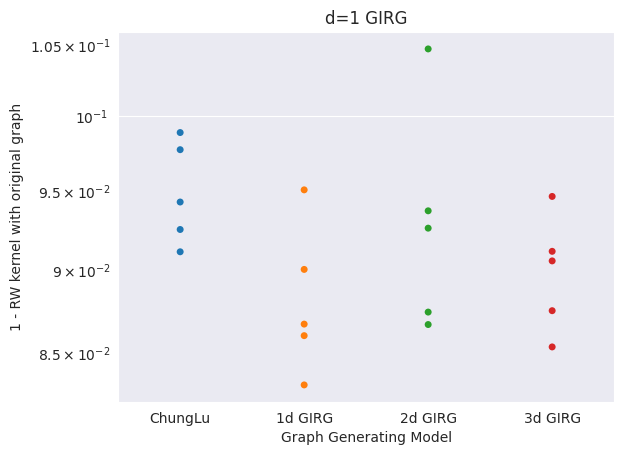

In [41]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=3000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=5, node_labelling_func=lambda g, v: g.degree(v))

Network Properties:
nodes, edges			3000, 75061
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016686
clustering coefficient		0.792405
min/max/avg degree		6, 2907, 50.040667
degree assortativity		-0.108176
number of connected components	1
size of largest component	3000 (100.00 %)
cl
0.900453954085601
0.9026429432439265
0.8980564590635068
0.894988198371
0.8996660816716795
0.8968911555877368
1
0.9080827988020006
0.9107653395474035
0.9122166133213838
0.9118323528005706
0.9058609714730576
0.9085766015151407
2
0.9095487570974824
0.907900795891701
0.9086956241159916
0.9079384732103318
0.9092453908600494
0.9112331245457009
3
0.9098360543767863
0.9089268648933605
0.9056247525531701
0.9013914110217018
0.9082601898934565
0.9060719806204134


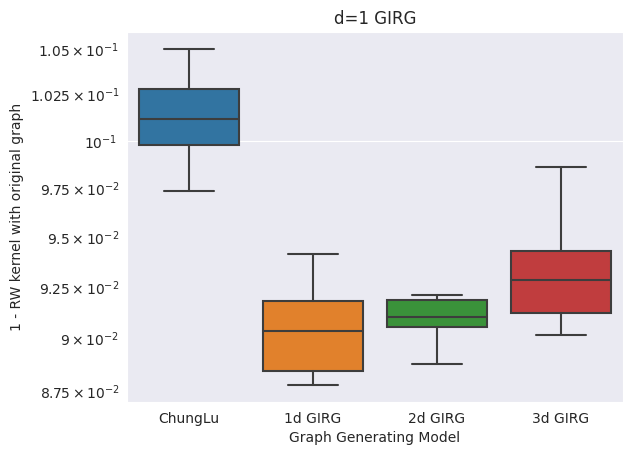

In [43]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=3000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			3000, 75217
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016720
clustering coefficient		0.485628
min/max/avg degree		8, 1818, 50.144667
degree assortativity		-0.102468
number of connected components	1
size of largest component	3000 (100.00 %)
cl
0.8998095718877525
0.8955844351041543
0.9026622429361841
0.8917707036054022
0.8976540183048085
0.8917026381970273
1
0.9093227991388534
0.9022126704919281
0.910926108581163
0.905045132683232
0.9116129861436568
0.9099168328820079
2
0.9092840839842171
0.9131554254372397
0.9074888417688178
0.9117289134490967
0.9049984764990845
0.9061041749346016
3
0.9094525863746146
0.9061067540922919
0.9086064728391553
0.9082034699098436
0.9052761734226594
0.9098314282626329


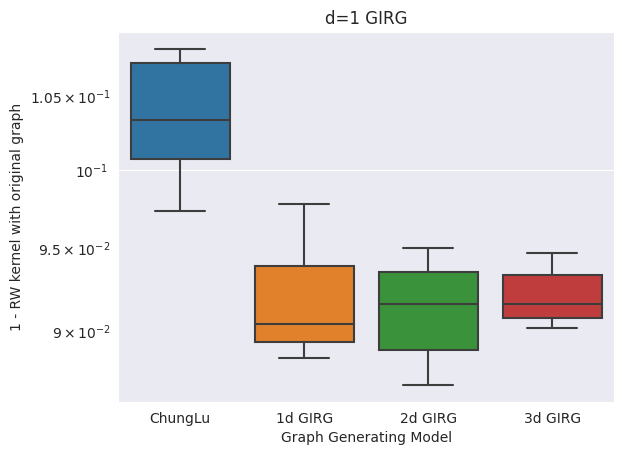

In [44]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=3000, tau=2.5, alpha=1.5, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			5000, 125601
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.010050
clustering coefficient		0.793639
min/max/avg degree		8, 2968, 50.240400
degree assortativity		-0.117087
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9303096431403631
0.9301595287093408
0.9346081689763509
0.9356402538423814
0.9323593041521672
0.927704730809581
1
0.9413723289784
0.9388942684346535
0.9428224603302827
0.9436227959386043
0.9450702470325559
0.9455666058405503
2
0.9417839256947204
0.9428772172030855
0.939527601336322
0.9463582778933137
0.9451951661876643
0.9467176838672453
3
0.9377018005827975
0.9416784674762514
0.9396640280070508
0.943898684111938
0.9440605084411156
0.9441361098449151


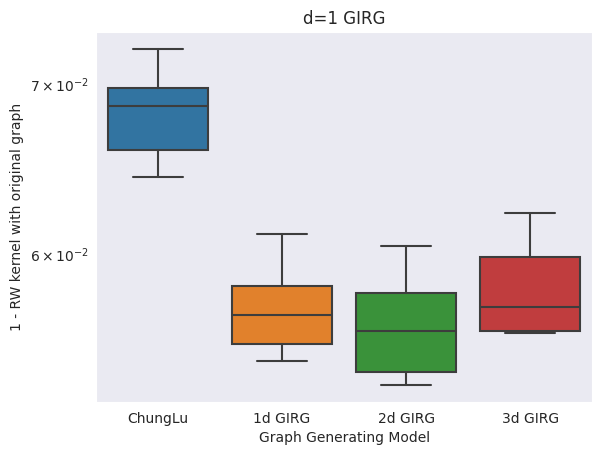

In [45]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			5000, 124994
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.010002
clustering coefficient		0.720716
min/max/avg degree		7, 3704, 49.997600
degree assortativity		-0.095251
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9322860202066835
0.9307630123717971
0.9314362029698977
0.9317432806335304
0.9352775394066748
0.9288544793229362
1
0.9415043499409772
0.9400016335044812
0.9438223155142386
0.9457804576031551
0.9434102236777385
0.9413039025265723
2
0.934933691666983
0.9448399245080317
0.9417702231451363
0.9401850811367817
0.9450099976065889
0.9418213300677095
3
0.9442792929080936
0.9439868704013898
0.9432368722750938
0.9423326765089621
0.9432669829999641
0.9427861202573629


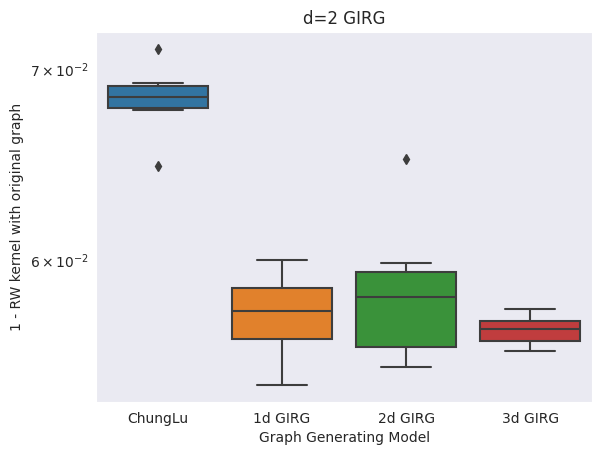

In [46]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			5000, 124497
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.009962
clustering coefficient		0.606289
min/max/avg degree		8, 2519, 49.798800
degree assortativity		-0.086208
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9322835997396006
0.9279630811875358
0.9312897600349133
0.9324190257364107
0.9324966789443817
0.9271081686151893
1
0.9224464645572706
0.9235975495238404
0.9416129369850602
0.9384269524861379
0.944156583381743
0.9280603938364407
2
0.9364564983279384
0.9389259735881287
0.9351119590348526
0.9383551257056076
0.9297767008981103
0.9382946100080412
3
0.9372351829486166
0.9325690145858611
0.9369425697402525
0.9358594162183081
0.9434445901430865
0.939478361952859


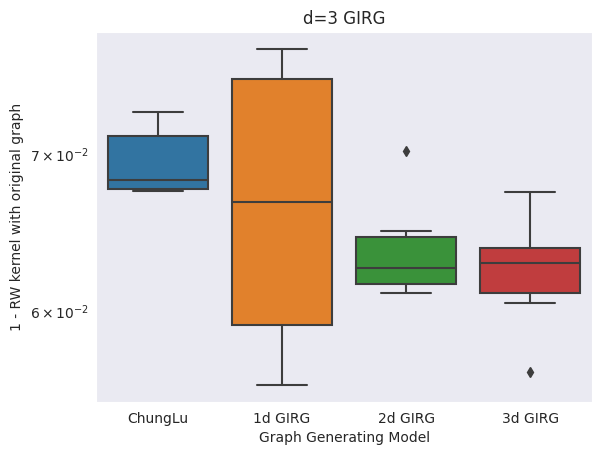

In [47]:
data, info = graph_kernels.multiple_girg_comparisons(d=3, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			3000, 75286
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016736
clustering coefficient		0.791639
min/max/avg degree		5, 2999, 50.190667
degree assortativity		-0.096888
number of connected components	1
size of largest component	3000 (100.00 %)
cl
0.8919133343339273
0.8936568477949328
0.8992899259748471
0.8925471819531599
0.8991353081136048
0.8915661381020284
0.895805232215699
0.8985520935821872
0.8980111966096893
0.8968388656285927
0.8985675080217613
1
0.9092572414610527
0.901482277183801
0.9018218163940415
0.9046115809686335
0.9098931454664028
0.9096156117739993
0.9053126712406623
0.9092794977674266
0.911605509224763
0.9124593281126169
0.9032384466026618
2
0.9038412627982838
0.9042717662799867
0.9158989731291314
0.9099853486381732
0.9119503878285956
0.9024893266807282
0.904620096868669
0.9128360326960396
0.9082557460439047
0.9071218633419698
0.9121821658521369
3
0.9138125432012193
0.9107451840073301
0.913792842885

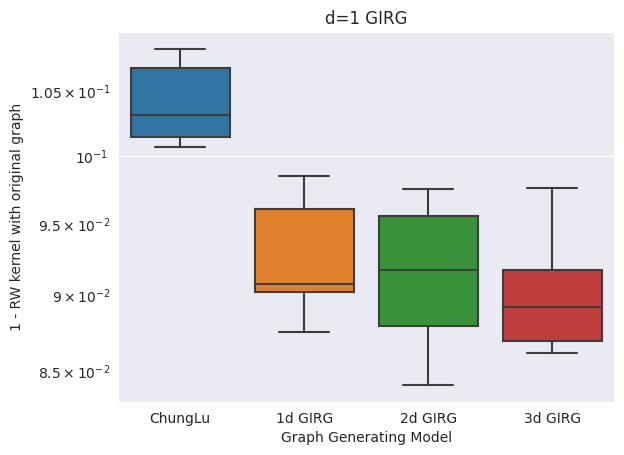

In [48]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=3000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=11, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			3000, 74897
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016649
clustering coefficient		0.733328
min/max/avg degree		9, 1785, 49.931333
degree assortativity		-0.135891
number of connected components	1
size of largest component	3000 (100.00 %)
cl
0.8962668875728729
0.8964534629223362
0.8993782433958769
0.8943384456913555
0.88890359384408
0.9015566118738535
0.8901169721153073
0.89733884755863
0.8968438161775123
0.8940597447156291
0.8979056368510222
1
0.905435147369228
0.9003531220382857
0.9055646226859527
0.9039884692281325
0.908126289378076
0.9158284514237723
0.8946647591317529
0.9033810329070894
0.9129492763252377
0.91112770373408
0.909605181451779
2
0.9121551834175091
0.9096335718042072
0.9110459344170769
0.9098178463656911
0.9143824166062787
0.906353022251715
0.9074403501153601
0.8969956179896388
0.9058007679129276
0.9094017845372813
0.9111198351808919
3
0.9083693828674548
0.9123682500979862
0.910319377023918
0.

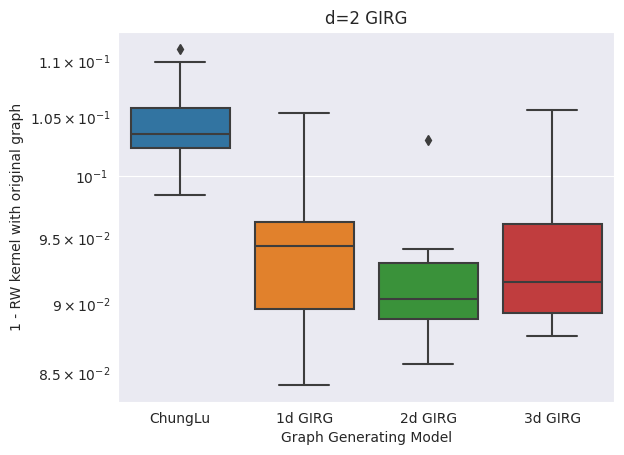

In [49]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=3000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=11, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			3000, 74987
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016669
clustering coefficient		0.617265
min/max/avg degree		9, 1633, 49.991333
degree assortativity		-0.113751
number of connected components	1
size of largest component	3000 (100.00 %)
cl
0.8874677299850368
0.8994873728367032
0.8937894002619083
0.8968479433179629
0.8915218073006812
0.8923444010099253
0.896385578483793
0.8959557534897848
0.8980525003412603
0.8884882246261558
0.892698671096051
1
0.9090268435372953
0.9044510704937572
0.9033982396658573
0.9094236093858623
0.908967503945221
0.9062599236479713
0.9112155859454388
0.9096225380076166
0.9034543472691853
0.909118275914147
0.9074197848907292
2
0.9085448873853941
0.9059066574115348
0.9032188077783286
0.9115797270230601
0.9072259651751752
0.9073773412919127
0.9074320303143788
0.9057696201431802
0.9068277399571871
0.9089124732672933
0.9091430769365625
3
0.9106137947720008
0.9102635087312423
0.909528752200

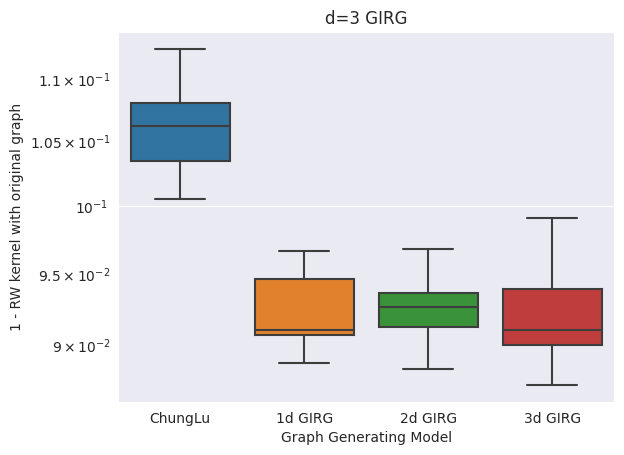

In [50]:
data, info = graph_kernels.multiple_girg_comparisons(d=3, n=3000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=11, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			5000, 125337
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.010029
clustering coefficient		0.786168
min/max/avg degree		7, 2970, 50.134800
degree assortativity		-0.098775
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9280382461311677
0.9336584768690269
0.9306290128260799
0.928291445397483
0.9341105689448289
0.9293675020573238
0.9316270371043789
0.9286383400208849
0.9346631827750205
0.9301391559569787
0.9254471660880533
0.925109401032884
0.9306922382315022
0.9336815522727546
0.9308226996652778
1
0.9389128852553277
0.9431381862091686
0.943342833149565
0.9374293350625729
0.942837009963302
0.9450806066185284
0.9413537692056025
0.9419168629920881
0.9430945221322963
0.9433760978468386
0.9436779830110283
0.9423004515950666
0.940788605251553
0.9394256538082301
0.9458789970146868
2
0.9413034453138294
0.9401188171233685
0.9401635458276332
0.9415942909946408
0.9408160589360277
0.94373894625320

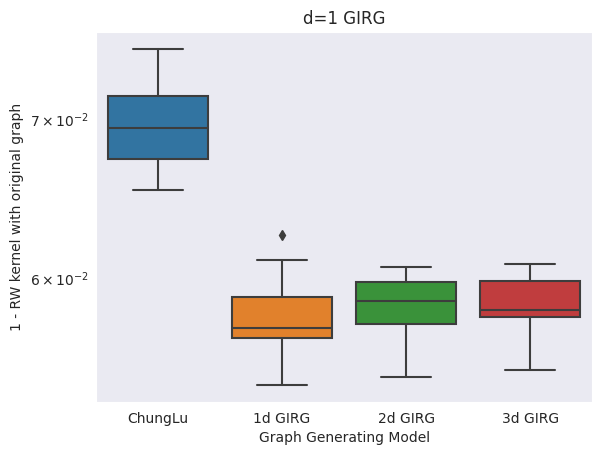

In [52]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=15, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			5000, 124764
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.009983
clustering coefficient		0.763138
min/max/avg degree		8, 4999, 49.905600
degree assortativity		-0.131494
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9327771884751148
0.9341469884219631
0.9278970855809976
0.9342276146238196
0.9348003181369434
0.9300089436108447
0.9345585715008078
0.9354995793453369
0.9369224620309041
0.9326871337343209
0.9341940318914517
0.9288231521761235
0.9329382863355317
0.9357376101936896
0.9365087799156778
1
0.9411135319802407
0.9419194476875887
0.9402747000908342
0.943777056691529
0.9458224069827439
0.9409538272017323
0.9434584147345277
0.9453534157997937
0.9437893838625485
0.9381234080476454
0.9435244943499346
0.9452338227353151
0.9418110947780107
0.9411382209027429
0.9434622148077026
2
0.9443748761640672
0.9378649166294567
0.9438314086657887
0.9458038963676044
0.9423951502368053
0.9441407043

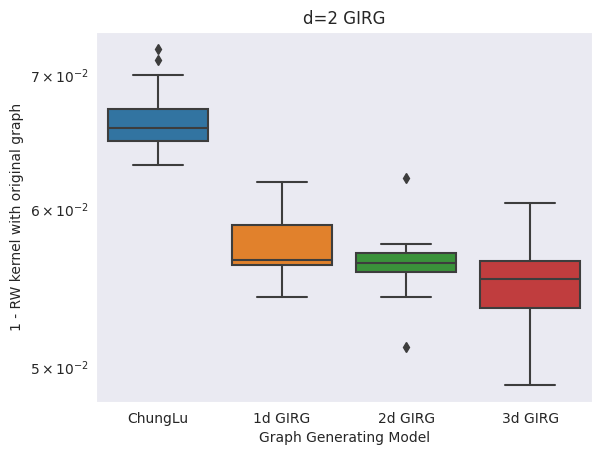

In [53]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=15, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			5000, 124655
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.009974
clustering coefficient		0.618255
min/max/avg degree		6, 2806, 49.862000
degree assortativity		-0.082730
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.926860922576696
0.930798410444656
0.9362362681358289
0.9298741498785779
0.9342868959075392
0.929224667696035
0.9274593716176215
0.9285721090254321
0.924907044112143
0.925827070176524
0.9303363600800334
0.9290504757473518
0.9302011751384143
0.9266170236192619
0.9319642617223686
1
0.9433692821584451
0.9445868736811243
0.9424426185788851
0.9415924273297064
0.9462385073902023
0.9453428066766191
0.9425121912946478
0.9421054764713329
0.9438682319192532
0.941877163000462
0.939604692058613
0.941279264156568
0.9438615885839071
0.9408268545410675
0.9398443763022489
2
0.9440176671489406
0.9353129030444245
0.9422151503835544
0.9420926550873758
0.9407958046691475
0.9437007255887658


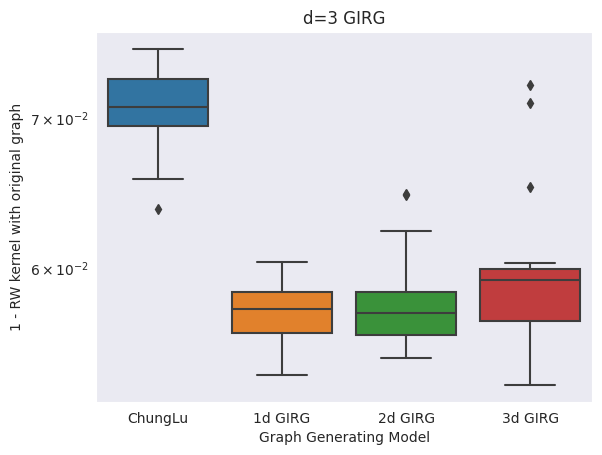

In [54]:
data, info = graph_kernels.multiple_girg_comparisons(d=3, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=15, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			3000, 75166
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016709
clustering coefficient		0.623138
min/max/avg degree		6, 1780, 50.110667
degree assortativity		-0.107337
number of connected components	1
size of largest component	3000 (100.00 %)
cl
0.8664313486226963
0.8607365928176296
0.8636450387736273
0.8663968770535175
0.86074252109085
0.8684488845964605
0.8635875405174679
0.8689456226148075
0.8719248337352132
0.8644239435062641
0.8653495486407065
0.8654487782077217
0.8679639182730878
0.8661690945205947
0.8662944367439434
1
0.8730428915971412
0.8790958745365279
0.8795209932733427
0.8719488727873703
0.879507439373311
0.8753943893034004
0.8762413790276578
0.8766034601113956
0.8786753810105471
0.8758372886528282
0.8748806847433079
0.8810223300061655
0.8825771408425072
0.8766303133817344
0.8791096783032597
2
0.8778541618151576
0.8772946362287986
0.8793075870677998
0.8781546081373404
0.8784913069869325
0.8778951561887

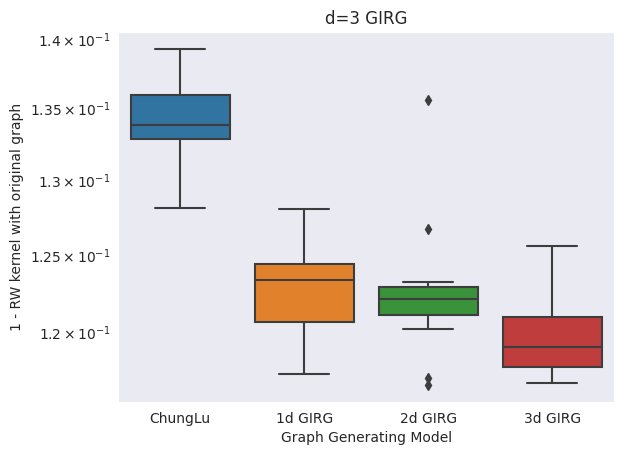

In [55]:
data, info = graph_kernels.multiple_girg_comparisons(d=3, n=3000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=7, normalize=True), n_per=15, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			3000, 74703
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016606
clustering coefficient		0.730529
min/max/avg degree		7, 2971, 49.802000
degree assortativity		-0.109722
number of connected components	1
size of largest component	3000 (100.00 %)
cl
0.8706895777065643
0.866151428853982
0.8744496311155092
0.8709872219649083
0.8692435362848523
0.8714422634608324
0.8659640991187427
0.8699556108608079
0.8739813368900964
0.8713526929924382
0.8732985801986503
0.8691494072297644
0.8684998166782109
0.869602963020698
0.8725604445843907
1
0.8843715511482653
0.8835153594854022
0.8863346550942208
0.8860772171262613
0.8869260113580383
0.8871631621252792
0.8847888472521406
0.8866708110265635
0.886229882099454
0.8806566586554436
0.8841801826995693
0.8847684918464357
0.8828240231940381
0.8840130724601948
0.8842750482544554
2
0.882438360375728
0.8808195504941415
0.8781112869450394
0.8788219225522546
0.8882891071920943
0.88778238297303

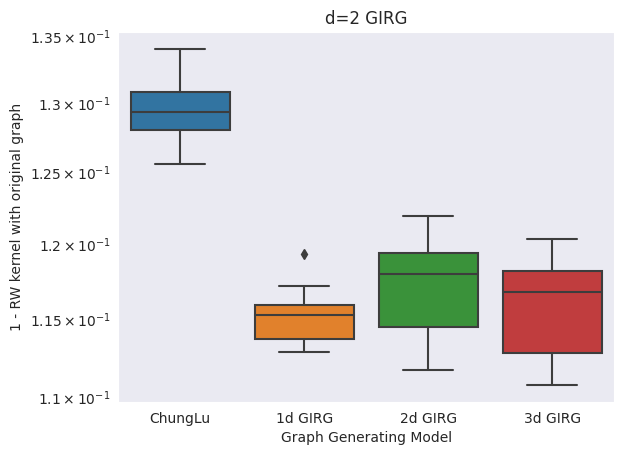

In [56]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=3000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=7, normalize=True), n_per=15, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			3000, 74758
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016618
clustering coefficient		0.795131
min/max/avg degree		6, 2478, 49.838667
degree assortativity		-0.133999
number of connected components	1
size of largest component	3000 (100.00 %)
cl
0.8649446357365956
0.8699066519697708
0.873356775601774
0.8742803452852989
0.874237976197296
0.8598877668738201
0.8697683096760088
0.8682855346665291
0.8659618040736354
0.867746185516451
0.8734826393862077
0.8679896112186449
0.8669269828567874
0.8744105188365826
0.8704069783179367
1
0.876415293779227
0.8841875960410088
0.8860056907363991
0.8824594057772637
0.8865539649438483
0.8812445858418779
0.8804803404537606
0.886364938285274
0.8766151882087257
0.876458604282109
0.8874179262552465
0.879228914737664
0.8877071105680986
0.8772999369089277
0.8822151233970478
2
0.8858906890579172
0.8841717917455924
0.8861068319022932
0.8835352771247175
0.8840804014311059
0.8793629917544
0.8

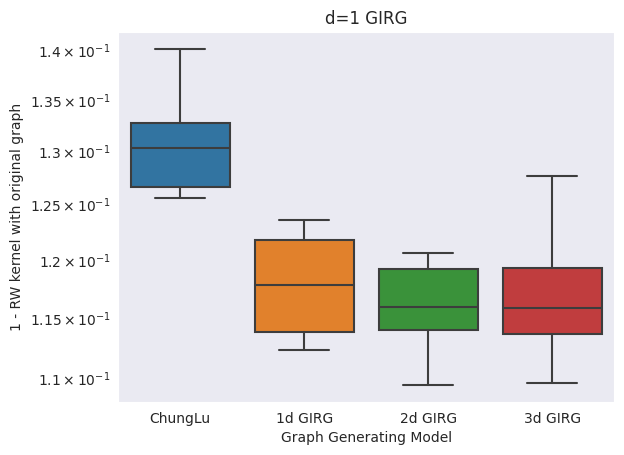

In [57]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=3000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=7, normalize=True), n_per=15, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

Network Properties:
nodes, edges			5000, 124642
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.009973
clustering coefficient		0.673135
min/max/avg degree		7, 4909, 49.856800
degree assortativity		-0.110841
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.920945321632948
0.9149677952373916
0.9182658419835471
0.9201988471607349
0.913622758004702
0.9159018024803381
0.9213588850668326
0.9191926818020911
0.9178873643233523
0.9186870869219925
0.9149713233465352
0.9176304921101225
0.9207866138012589
0.9159565439029081
0.9158783628354256
1
0.9247992926939654
0.9293948152774174
0.9262355343529082
0.9275156893234442
0.9242818408187099
0.9266783721496435
0.9305679186102842
0.9250709450755827
0.928283673814665
0.9286038267195471
0.9294773308564014
0.9171016133662128
0.9276999992864698
0.9284242434229453
0.9166250148617361
2
0.9296473267915635
0.9202884334968394
0.9272149132890101
0.9296610171990222
0.9253522647150034
0.927233281670

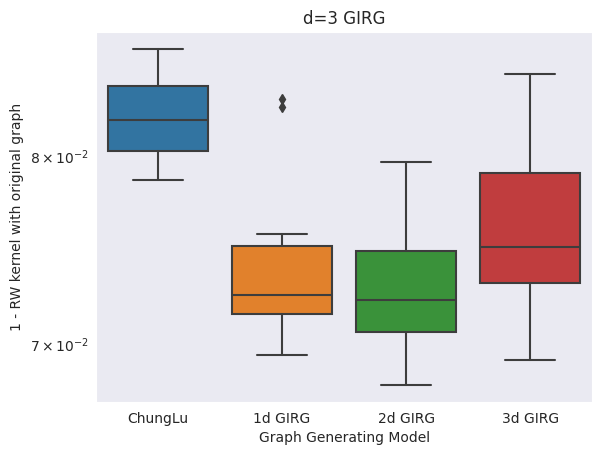

In [58]:
data, info = graph_kernels.multiple_girg_comparisons(d=3, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=7, normalize=True), n_per=15, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot')

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


Network Properties:
nodes, edges			1000, 10848
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.021718
clustering coefficient		0.661930
min/max/avg degree		1, 628, 21.696000
degree assortativity		-0.130020
number of connected components	1
size of largest component	1000 (100.00 %)
cl
0.7987829632416039
0.7889103787285268
0.7953357617855902
0.8036128137373237
0.8036043589033056
0.7911820431071365
0.7840800404220408
0.7993980393560668
0.799947610722388
0.7937506196278002
0.8058451473474462
0.7916213069557231
0.8049174972886016
0.7932229776565027
0.7879924684732927
1


../benji_girgs/generation.py:626: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:627: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


0.7305566997312357
0.7285109871958682
0.7194219831969014
0.7521062097814196
0.7459707812970842
0.7337581063626326
0.7388906804579167
0.7758337504809675
0.7531023521048423
0.7658774913050403
0.7703960988576731
0.7432177320249101
0.727972395155053
0.74796314859318
0.746504708631672
2
0.773841494936317
0.7964148362878901
0.7792494612355934
0.798102616359685
0.8052594427254036
0.7780291628168736
0.8004052824234055
0.7636809947835084
0.7723769609057998
0.7687187032975297
0.7662739500474508
0.7804878979601763
0.7810387185494377
0.7918099005085552
0.8052128401297849
3
0.8077051364179155
0.8124840247270896
0.8140918917060126
0.8094148579367403
0.8136867375437421
0.8149633660004733
0.8071859839442395
0.8153546376290345
0.8081757068939072
0.8127169772221867
0.8145633492224967
0.8146891940673511
0.7991468437701209
0.8157106789198757
0.7225584362746966


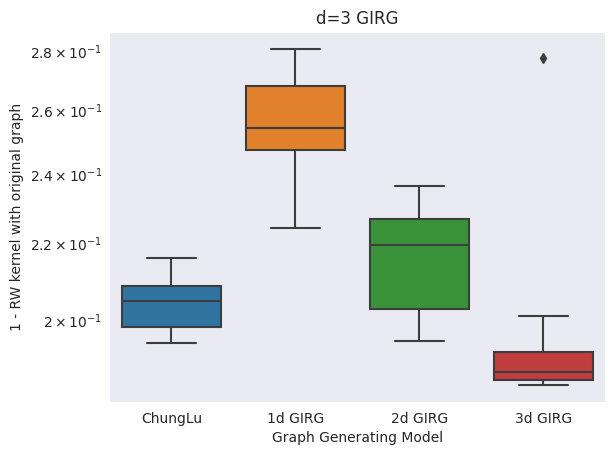

In [99]:
data, info = graph_kernels.multiple_girg_comparisons(d=3, n=1000, tau=2.5, alpha=5.0, desiredAvgDegree=30.0, kernel=grakel.WeisfeilerLehman(n_iter=7, normalize=True), n_per=15, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot',
                                                     points_type=points.PointsCube)

In [ ]:
data.mean().plot()

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


Network Properties:
nodes, edges			2000, 27624
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.013819
clustering coefficient		0.755127
min/max/avg degree		2, 1952, 27.624000
degree assortativity		-0.113290
number of connected components	1
size of largest component	2000 (100.00 %)
cl
0.8698795862007499
0.8760632094048545
0.872802114797251
0.8743417372513429
0.8634362297555513
0.8736662015974228
0.8709470180552318
0.8782176101046439
0.8641907833407194
0.8752143822646768
0.8669868758286627
1


../benji_girgs/generation.py:626: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:627: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


0.8869463937055028
0.881588454112264
0.8878431027895266
0.882506892179484
0.8807232827942181
0.8805481561377264
0.8897313431166552
0.8815276456918587
0.8876037889513148
0.8869858885296451
0.8824934934789253
2
0.8760407841499077
0.8640306525584608
0.870485815691784
0.880482353410181
0.886458839277573
0.8742490711759124
0.8860596749957722
0.8943222743353652
0.8819550416401783
0.8895224135423954
0.8829727191168184
3
0.8293898608393249
0.8573641903638338
0.8402350100304838
0.8008275495530545
0.8294135745777931
0.8536719981027479
0.8682921912460432
0.8298115685806634
0.830929746469938
0.8242584720150519
0.8188971761333684


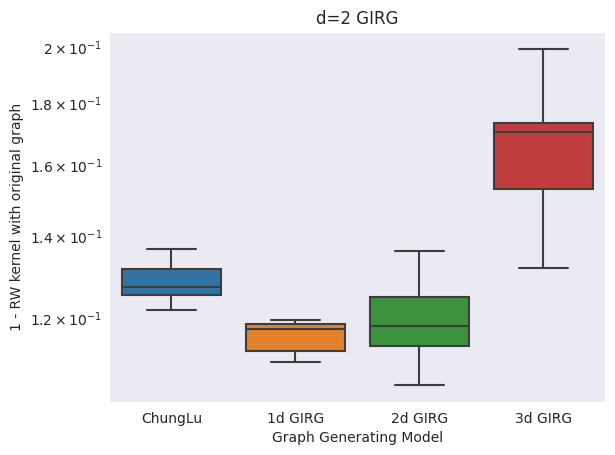

In [104]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=2000, tau=2.5, alpha=5.0, desiredAvgDegree=30.0, kernel=grakel.WeisfeilerLehman(n_iter=7, normalize=True), n_per=11, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot',
                                                     points_type=points.PointsCube)

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:626: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:627: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


Network Properties:
nodes, edges			2000, 29127
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.014571
clustering coefficient		0.812550
min/max/avg degree		3, 1997, 29.127000
degree assortativity		-0.143562
number of connected components	1
size of largest component	2000 (100.00 %)
cl
0.8756826354141004
0.870131241746758
0.874029809924959
0.8815509338727079
0.8780104056958049
0.8742041475656849
0.8726816059664558
0.8732081995475459
0.8750537951522177
0.8751960775085268
0.8734837563514348
1
0.8896820374695049
0.8866810686474735
0.8885046129505586
0.883850509318916
0.8843615812263343
0.8895601438059121
0.8855284545294543
0.8917747234999893
0.8662975063071768
0.8741922812009472
0.8657355773295792
2
0.8962737320544357
0.886837466704163
0.8860142831834583
0.8926860712853983
0.887541641036431
0.8764311200385009
0.8838338249947594
0.881884623877035
0.882518320314685
0.8804353979998163
0.6392198150698057
3
0.8503155413527828
0.8715801371239196
0.851917792591613

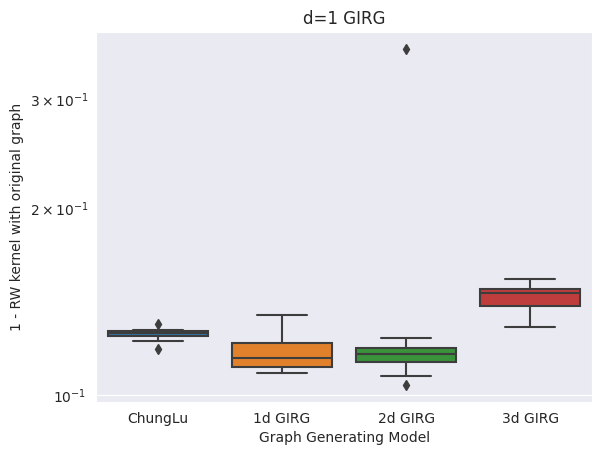

In [105]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=2000, tau=2.5, alpha=5.0, desiredAvgDegree=30.0, kernel=grakel.WeisfeilerLehman(n_iter=7, normalize=True), n_per=11, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot',
                                                     points_type=points.PointsCube)

<AxesSubplot: >

(0.1, 0.18)

Text(0.5, 1.0, 'd=1 GIRG')

Text(0.5, 0, 'Graph Generating Model')

Text(0, 0.5, '1 - WL kernel with original graph')

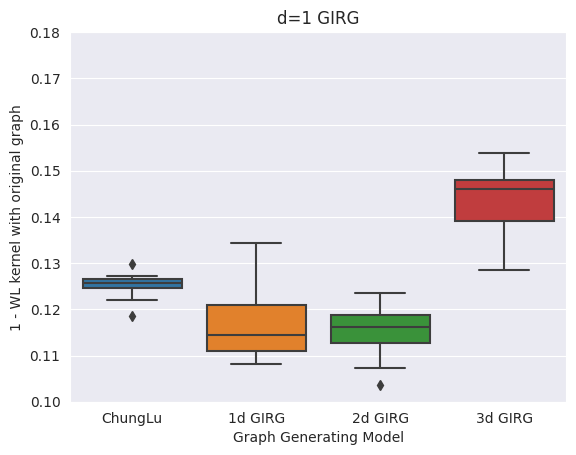

In [108]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=2000, tau=2.5, alpha=5.0, desiredAvgDegree=30.0, kernel=grakel.WeisfeilerLehman(n_iter=7, normalize=True), n_per=11, node_labelling_func=lambda g, v: g.degree(v), plot_type='boxplot',
                                                     points_type=points

In [60]:
def g_to_grakel(g_nk, node_labelling_func=None):
    gnx = nk.nxadapter.nk2nx(g_nk)
    A = nx.adjacency_matrix(gnx).todense()
    if node_labelling_func is None:
        g_gk = grakel.Graph(A)
    else:
        g_gk = grakel.Graph(A, node_labels={v: node_labelling_func(g_nk, v) for v in g_nk.iterNodes()})
    return g_gk

points_type=points.PointsTorus2
c_implementation=True

n=3000
tau=2.5
alpha=5.0
desiredAvgDegree=50.0

def gen_girg(d):
    g, edges, weights, pts, const = generation.generate_GIRG_nk(
        n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points_type, c_implementation=c_implementation)
    return g

g = gen_girg(1)
g = utils.get_largest_component(g)
g_gk = g_to_grakel(g, node_labelling_func=lambda g, v: g.degree(v))


kernel = grakel.WeisfeilerLehman(n_iter=5, normalize=True)
kernel.fit_transform([g_gk])

array([[1.]])

In [77]:
nk.overview(g)

Network Properties:
nodes, edges			3000, 75637
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016814
clustering coefficient		0.795684
min/max/avg degree		7, 2999, 50.424667
degree assortativity		-0.108982
number of connected components	1
size of largest component	3000 (100.00 %)


In [84]:
ddarr = np.array(nk.centrality.DegreeCentrality(g).run().scores())
dd = sorted(ddarr, reverse=True)

In [86]:
ddarr.shape
ddarr[:10]

(3000,)

array([ 21.,  51.,  23., 122.,  12.,  22., 123.,  22.,  18.,  20.])

In [87]:
np.histogram(ddarr, bins=10)

(array([2956,   33,    8,    1,    0,    1,    0,    0,    0,    1]),
 array([   7. ,  306.2,  605.4,  904.6, 1203.8, 1503. , 1802.2, 2101.4,
        2400.6, 2699.8, 2999. ]))

In [94]:
def graph_to_labels(g, num_colors=5):
    ddarr = np.array(nk.centrality.DegreeCentrality(g).run().scores())
    bin_edges = histedges_equalN(ddarr, num_colors)
    colors = np.digitize(ddarr, bin_edges)
    return colors

def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))




In [97]:
list(g.iterNodes())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [98]:
colors

array([2, 4, 2, ..., 2, 4, 3])

(array([584.,   0., 555.,   0., 635.,   0., 618.,   0., 607.,   1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

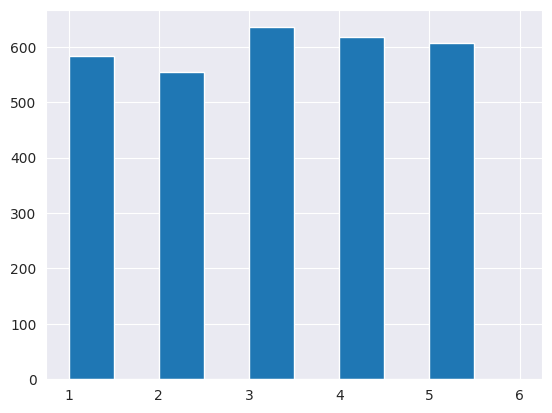

In [96]:
plt.hist(colors)

In [93]:
foo = np.array([7, 8, 24, 25, 39, 40, 2888])
np.digitize(foo, edges)

array([1, 1, 2, 2, 3, 3, 3])

In [74]:
g1 = gen_girg(1)
g1 = utils.get_largest_component(g1)
g_gk1 = g_to_grakel(g1, node_labelling_func=lambda g, v: g.degree(v))
K = kernel.transform([g_gk1])[0, 0]
K

0.9079842880495274

In [75]:
g1 = gen_girg(2)
g1 = utils.get_largest_component(g1)
g_gk1 = g_to_grakel(g1, node_labelling_func=lambda g, v: g.degree(v))
K = kernel.transform([g_gk1])[0, 0]
K

0.9111964776405163

In [39]:
ainfo

{'n': 3000,
 'tau': 2.5,
 'alpha': 5.0,
 'desiredAvgDegree': 50.0,
 'd': 1,
 'kernel': WeisfeilerLehman(normalize=True),
 'points_type': benji_girgs.points.PointsTorus2,
 'c_implementation': True}

<AxesSubplot: >

Text(0, 0.5, '1 - RW kernel with original graph')

Text(0.5, 0, 'Graph Generating Model')

Text(0.5, 1.0, 'd=2 GIRG')

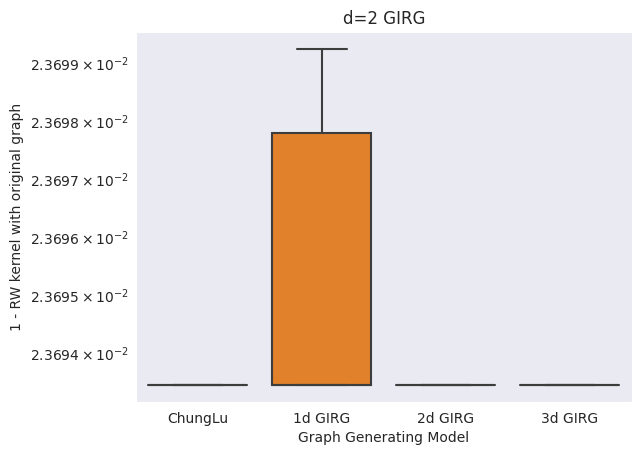

In [35]:
import seaborn as sns
sns.boxplot(data=data)
plt.yscale('log')
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')
plt.title(f'd={d} GIRG')

Network Properties:
nodes, edges			5000, 124705
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.009978
clustering coefficient		0.797281
min/max/avg degree		8, 4999, 49.882000
degree assortativity		-0.088836
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9551027632863961
0.9551027632863961
0.9551027632863961
0.9551027632863961
0.9551027632863961
0.9551027632863961
1
0.946443548779435
0.9438509979939567
0.9422026831562256
0.9462595765470584
0.9461704622905928
0.9453611337845516
2
0.9448609403403276
0.9439582707807819
0.9403145234599082
0.9362823312838332
0.9415957465723468
0.9436390669889442
3
0.9398924155966114
0.9434310485347157
0.9440903936894277
0.9456007161759024
0.9471495078962928
0.9460368443303412


(    ChungLu   1d GIRG   2d GIRG   3d GIRG
 0  0.044897  0.053556  0.055139  0.060108
 1  0.044897  0.056149  0.056042  0.056569
 2  0.044897  0.057797  0.059685  0.055910
 3  0.044897  0.053740  0.063718  0.054399
 4  0.044897  0.053830  0.058404  0.052850
 5  0.044897  0.054639  0.056361  0.053963,
 {'n': 5000,
  'tau': 2.5,
  'alpha': 5.0,
  'desiredAvgDegree': 50.0,
  'd': 1,
  'kernel': WeisfeilerLehman(normalize=True),
  'points_type': benji_girgs.points.PointsTorus2,
  'c_implementation': True})

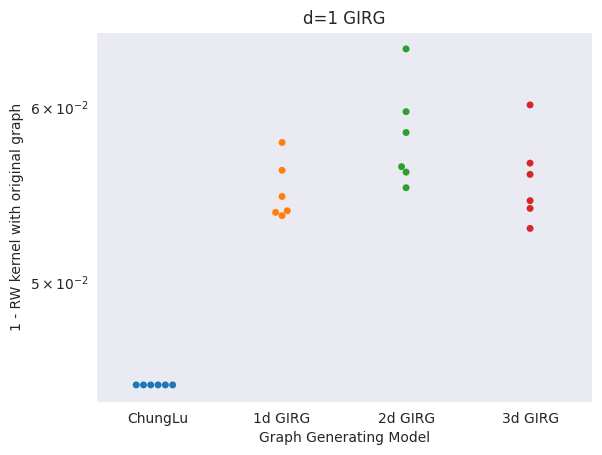

In [28]:
graph_kernels.multiple_girg_comparisons(d=1, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v))

Network Properties:
nodes, edges			5000, 124605
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.009970
clustering coefficient		0.725222
min/max/avg degree		5, 2965, 49.842000
degree assortativity		-0.103369
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9530481162904255
0.9530481162904255
0.9530481162904255
0.9530481162904255
0.9530481162904255
0.9530481162904255
1
0.9436618255473289
0.9452373665784226
0.9429630342886186
0.9445837118168051
0.9440284567472929
0.9475093287977442
2
0.9409771434715527
0.9427559468738487
0.9406546598528615
0.943854764565045
0.9424474021630851
0.9436886867688872
3
0.9428175766531613
0.9441023298743321
0.9449741274005472
0.9390613518417896
0.9442382936345546
0.9431108963185789


(    ChungLu   1d GIRG   2d GIRG   3d GIRG
 0  0.046952  0.056338  0.059023  0.057182
 1  0.046952  0.054763  0.057244  0.055898
 2  0.046952  0.057037  0.059345  0.055026
 3  0.046952  0.055416  0.056145  0.060939
 4  0.046952  0.055972  0.057553  0.055762
 5  0.046952  0.052491  0.056311  0.056889,
 {'n': 5000,
  'tau': 2.5,
  'alpha': 5.0,
  'desiredAvgDegree': 50.0,
  'd': 2,
  'kernel': WeisfeilerLehman(normalize=True),
  'points_type': benji_girgs.points.PointsTorus2,
  'c_implementation': True})

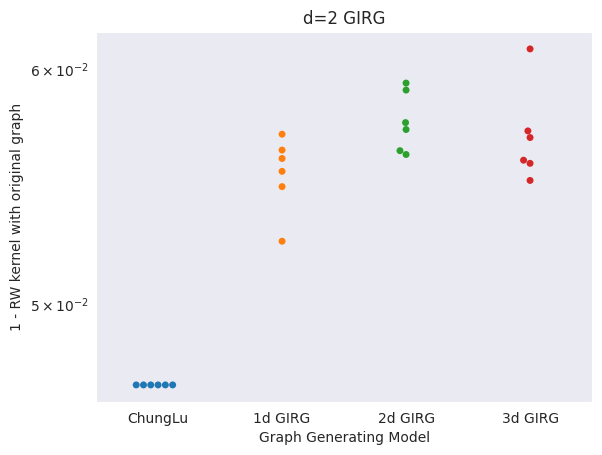

In [29]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v))

In [ ]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v))

In [11]:
g = nk.Graph(8)
g.addEdge(2, 3)
g.addEdge(3, 4)
g.addEdge(4, 5)
g.addEdge(2, 5)
g.addEdge(6, 7)

gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
A

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])

In [10]:
g = nk.Graph(6)
g.addEdge(0, 1)
g.addEdge(1, 2)
g.addEdge(2, 3)
g.addEdge(0, 3)
g.addEdge(4, 5)

gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
A

array([[0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [26]:
graph_kernels.multiple_girg_comparisons(d=1, n=100, tau=2.5, alpha=1.5, desiredAvgDegree=20.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=3, node_labelling_func=lambda g, v: g.degree(v))

Network Properties:
nodes, edges			100, 994
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.200808
clustering coefficient		0.584483
min/max/avg degree		5, 86, 19.880000
degree assortativity		-0.155669
number of connected components	1
size of largest component	100 (100.00 %)


ValueError: Graph does not have any labels for vertices.

In [16]:
rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-5, kernel_type='geometric')
rw_kernel.fit_transform([g_gk, g_gk1])

array([[1.        , 0.99998873],
       [0.99998873, 1.        ]])

array([[1.]])

cl
0.9999918099131951
0.9999924435160406
0.9999924883381476


../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


0.999995675577508
0.999996417334321
0.999994882361533


<AxesSubplot: >

Text(55.847222222222214, 0.5, '1 - RW kernel with original graph')

Text(0.5, 23.52222222222222, 'Graph Generating Model')

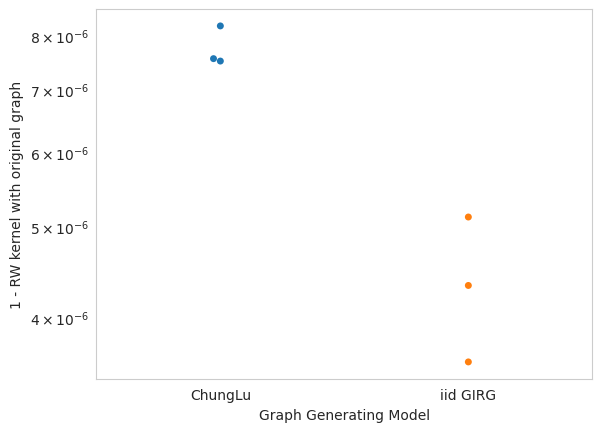

In [17]:
import warnings
import seaborn as sns

rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])

def g_out_to_similarity(g_out):
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)
    return rw_kernel.transform([g_gk1])[0, 0]


outs = []
n_per = 3
outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    out = g_out_to_similarity(g1)
    print(out)
    outs[-1].append(out)


outs.append([])
for i in range(n_per):
    g = gen_girg()
    out = g_out_to_similarity(g)
    print(out)
    outs[-1].append(out)


data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', 'iid GIRG'])
sns.swarmplot(data=data)
plt.yscale('log')
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')

In [9]:
def multiple_girg_comparisons(d=1):
    n = 1000
    # d=2
    tau=2.5
    alpha=1.5
    desiredAvgDegree= 50.0

    def gen_girg(d):
        g, edges, weights, pts, const = generation.generate_GIRG_nk(
            n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsTorus2, c_implementation=True)
        return g

    g = gen_girg(d)

    # g = generation.chung_lu_mixin_graph(g, weights, 0.5)
    g = utils.get_largest_component(g)
    nk.overview(g)
    # n = g.numberOfNodes()


    gnx = nk.nxadapter.nk2nx(g)
    A = nx.adjacency_matrix(gnx).todense()
    g_gk = grakel.Graph(A)

    import warnings
    import seaborn as sns

    # rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
    # rw_kernel.fit_transform([g_gk])
    rw_kernel = grakel.kernels.ShortestPath(normalize=True, with_labels=False)
    rw_kernel.fit_transform([g_gk])


    def g_out_to_similarity(g_out):
        A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
        g_gk1 = grakel.Graph(A1)
        return rw_kernel.transform([g_gk1])[0, 0]


    outs = []
    n_per = 3
    outs.append([])
    print('cl')
    for i in range(n_per):
        g1 = generation.fit_chung_lu(g, seed=i)
        out = g_out_to_similarity(g1)
        print(out)
        outs[-1].append(out)


    for d1 in [1, 2, 3]:
        print(d1)
        outs.append([])
        for i in range(n_per):
            g = gen_girg(d1)
            out = g_out_to_similarity(g)
            print(out)
            outs[-1].append(out)


    data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', '1d GIRG', '2d GIRG', '3d GIRG'])
    sns.swarmplot(data=data)
    plt.yscale('log')
    plt.ylabel('1 - RW kernel with original graph')
    plt.xlabel('Graph Generating Model')
    plt.title(f'd={d} GIRG')

Network Properties:
nodes, edges			1000, 24963
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.049976
clustering coefficient		0.511384
min/max/avg degree		12, 619, 49.926000
degree assortativity		-0.131303
number of connected components	1
size of largest component	1000 (100.00 %)
cl
0.9990133299009022
0.9987511793024239
0.9990636360315382
1
0.9923170985474642
0.9975277168779864
0.9997604031141871
2
0.9923440769188056
0.9917786987570971
0.9891923568517244
3
0.9971330009344267
0.9914103834803405
0.9999970546382881


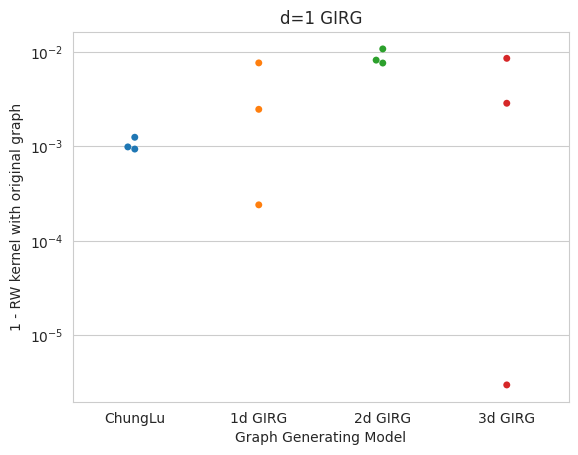

In [10]:
multiple_girg_comparisons(1)

In [29]:
multiple_girg_comparisons(2)

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


Network Properties:
nodes, edges			5000, 124416
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.009955
clustering coefficient		0.418672
min/max/avg degree		9, 1379, 49.766400
degree assortativity		-0.063198
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9999999245816945
0.9999998982682622
0.9999999145615904
1


../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


0.9999913198414127
0.999998005038737
0.9999966697728003
2
0.9999770932172345
0.9999830707647405


KeyboardInterrupt: 

In [ ]:
multiple_girg_comparisons(3)

In [10]:
fe = feature_extractor.FeatureExtractor([])
info, g_out = fe.fit_ndgirg_non_c_implementation(1, utils.LCC, cube=False, copy_weights=True, verbose=True)(g)

calling goal_f(alpha=100.0)
calling goal_f(alpha=2.0)
calling goal_f(alpha=1.0101010101010102)
a: 0.01, m: 0.5, b: 0.99, f_a: 0.7985233449897305, f_m: 0.6112889305745735, f_b: 0.2240963064554667, goal: 0.4793635656092471

calling goal_f(alpha=1.342281879194631)
a: 0.5, m: 0.745, b: 0.99, f_a: 0.6112889305745735, f_m: 0.4002385916804324, f_b: 0.2240963064554667, goal: 0.4793635656092471

calling goal_f(alpha=1.6064257028112447)
a: 0.5, m: 0.6225, b: 0.745, f_a: 0.6112889305745735, f_m: 0.5023838894085333, f_b: 0.4002385916804324, goal: 0.4793635656092471

calling goal_f(alpha=1.462522851919561)
a: 0.6225, m: 0.6837500000000001, b: 0.745, f_a: 0.5023838894085333, f_m: 0.4478084640324358, f_b: 0.4002385916804324, goal: 0.4793635656092471

calling goal_f(alpha=1.5311004784688993)
a: 0.6225, m: 0.6531250000000001, b: 0.6837500000000001, f_a: 0.5023838894085333, f_m: 0.47402484559637525, f_b: 0.4478084640324358, goal: 0.4793635656092471

calling goal_f(alpha=1.5678588926996568)
a: 0.6225, m:

In [11]:
nk.overview(g_out)

Network Properties:
nodes, edges			2000, 49913
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.024969
clustering coefficient		0.481302
min/max/avg degree		4, 994, 49.913000
degree assortativity		-0.073083
number of connected components	1
size of largest component	2000 (100.00 %)


array([[1.]])

cl
0.9999976581042318
0.9999973730112305
0.9999979606277212
1
0.9999966386702969
0.9999971996981347
0.9999970865684548
2
0.9999978925073064
0.9999974941606985
0.9999976941996892
3
0.9999980963470168
0.9999980389740671
0.9999980701722689
4
0.9999987730686426
0.9999988636375683
0.9999988634298059


<AxesSubplot: >

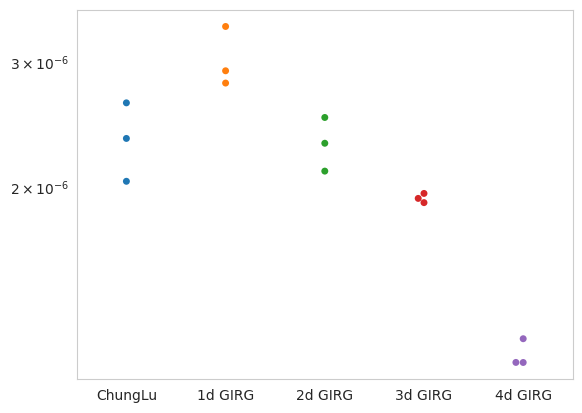

In [13]:
import warnings
import seaborn as sns
gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)

rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])

def fit_cube(g, kernel, d=1, name='sofcb-Reed98'):
    fe = feature_extractor.FeatureExtractor([])
    info, g_out = fe.fit_ndgirg_non_c_implementation(d, utils.LCC, cube=True, copy_weights=True, verbose=False)(g)

    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)

    return kernel.transform([g_gk1])[0, 0]

def fit_torus(g, kernel, d=1):
    fe = feature_extractor.FeatureExtractor([])
    info, g_out = fe.fit_ndgirg_non_c_implementation(d, utils.LCC, cube=False, copy_weights=True, verbose=False)(g)

    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)

    return kernel.transform([g_gk1])[0, 0]

name='n=2000 2D GIRG tau=2.5 a=1.5 dbar=50 LCC fit torus'
outs = []
n_per = 3
outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    # nk.overview(g1)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)
    out = rw_kernel.transform([g_gk1])[0, 0]
    print(out)
    outs[-1].append(out)

for d in range(1, 5):
    print(d)
    outs.append([])
    for i in range(n_per):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            out = fit_torus(g, rw_kernel, d=d)
        outs[-1].append(out)
        print(out)

data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', '1d GIRG', '2d GIRG', '3d GIRG', '4d GIRG'])
sns.swarmplot(data=data)
plt.yscale('log')

<AxesSubplot: >

Text(0.5, 1.0, 'n=2000 2D GIRG tau=2.5 a=1.5 dbar=50 LCC fit torus')

Text(50.222222222222214, 0.5, '1 - RW kernel with original graph')

Text(0.5, 36.72222222222221, 'Graph Generating Model')

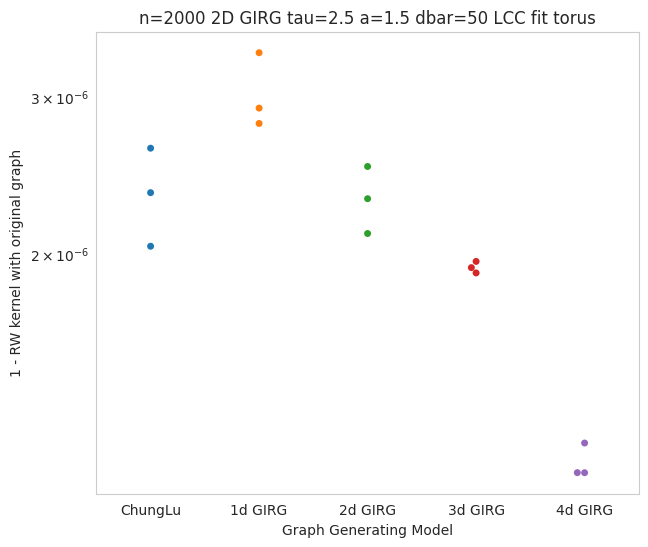

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
folder = '../kernel_generated_plots'
os.makedirs(folder, exist_ok=True)
data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', '1d GIRG', '2d GIRG', '3d GIRG', '4d GIRG'])
sns.swarmplot(data=data)
plt.yscale('log')
plt.title(f"{name}")
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')
plt.savefig(f'{folder}/{name}.png')
pickle.dump((fig, ax), open(f'{folder}/{name}.pkl', 'wb'))

In [16]:
rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])
# exponential just takes forever???

def get_rw_kernel(g1):
    return rw_kernel.transform([g1])[0, 0]

array([[1.]])

In [26]:
from feature_extractor import FeatureExtractor
fe = FeatureExtractor([])

def temp(d=1):
    # _, _, _, _, _, MC = mcmc.g_initialised_mcmc(g, alpha=1.3, const=1.0, pts_d=d, diffmap_init=False, graph_name='Reed98', failure_prob=0.3, cl_mixin_prob=0.5)
    # g_MC = MC_to_g_grakel(MC)

    g1, _, _, _, _ = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree,
                                                                points_type=points.PointsCube, failure_rate=0.3,
                                                                cl_mixin_prob=0.0)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)

    return get_rw_kernel(g_gk1)


def temp_fit(d=1):
    info, g_out = fe.fit_ndgirg_general(d, utils.LCC, cube=False, copy_weights=True, verbose=False)(g)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)

    return get_rw_kernel(g_gk1)

def temp_copyweight_cube(d=1, name='sofcb-Reed98'):
    row = df.loc[df.Graph == name].sort_values('Model').iloc[d-1]
    alpha = row.alpha
    const = float(row.Info['const'])

    weights = np.array(utils.graph_degrees_to_weights(g))
    g1, _, _, _, _ = generation.generate_GIRG_nk(n, d, tau, alpha, const=const, weights=weights,
                                                                points_type=points.PointsCube)
    # nk.overview(g1)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)

    return get_rw_kernel(g_gk1)

def MC_to_g_grakel(MC):
    _, A_MC = MC.MC_to_g_A()
    return grakel.Graph(A_MC)


In [38]:
import importlib
importlib.reload(generation)

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

'/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne'

Network Properties:
nodes, edges			2235, 90954
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.036433
clustering coefficient		0.310386
min/max/avg degree		1, 467, 81.390604
degree assortativity		0.058704
number of connected components	1
size of largest component	2235 (100.00 %)
cl
0.9990804428429227
0.9990776207349124
0.9990740809235421
0.9990906643176521
1
0.9991202742809211
0.9991442686936233
0.9991396569092426
0.9990867031672427
2
0.9990572963422394
0.99914131674861
0.999094264845294
0.999094017048572
3
0.9990935569430259
0.9990727826085387
0.999141852540862
0.9991086087897754


<AxesSubplot: >

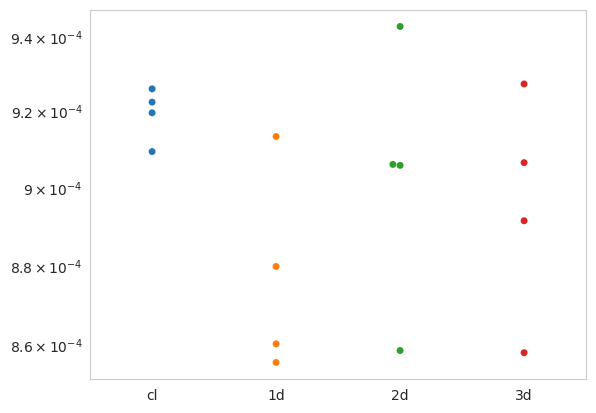

In [46]:
import warnings
import seaborn as sns


name = 'socfb-Amherst41'

gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()


gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)


outs = []

n_per = 4

outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)
    out = get_rw_kernel(g_gk1)
    print(out)
    outs[-1].append(out)

for d in range(1, 4):
    print(d)
    outs.append([])
    for i in range(n_per):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            out = temp_copyweight_cube(d=d, name=name)
        outs[-1].append(out)
        print(out)


data = pd.DataFrame(1 - np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)
plt.yscale('log')


'/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne'

Network Properties:
nodes, edges			2235, 90954
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.036433
clustering coefficient		0.310386
min/max/avg degree		1, 467, 81.390604
degree assortativity		0.058704
number of connected components	1
size of largest component	2235 (100.00 %)


array([[1.]])

cl
0.9999999977921624
0.9999999918599373
0.9999999811197327
0.999999977744551
1
0.9999994391300787
0.9999987706374487
0.9999989146521039
0.9999988839585013
2
0.9999992973935816
0.9999997289128006
0.9999991832588693
0.9999993900357466
3
0.9999992668916675
0.9999989151483528
0.9999988130952565
0.9999993430895892


<AxesSubplot: >

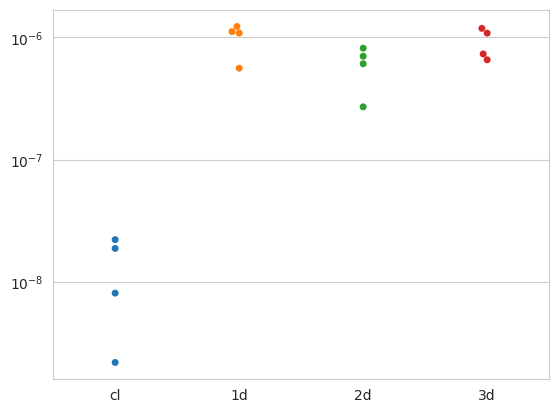

In [47]:
import warnings
import seaborn as sns


name = 'socfb-Amherst41'

gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()


gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)


rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])
# exponential just takes forever???

def get_rw_kernel(g1):
    return rw_kernel.transform([g1])[0, 0]


outs = []

n_per = 4

outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)
    out = get_rw_kernel(g_gk1)
    print(out)
    outs[-1].append(out)

for d in range(1, 4):
    print(d)
    outs.append([])
    for i in range(n_per):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            out = temp_copyweight_cube(d=d, name=name)
        outs[-1].append(out)
        print(out)


data = pd.DataFrame(1 - np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)
plt.yscale('log')


<AxesSubplot: >

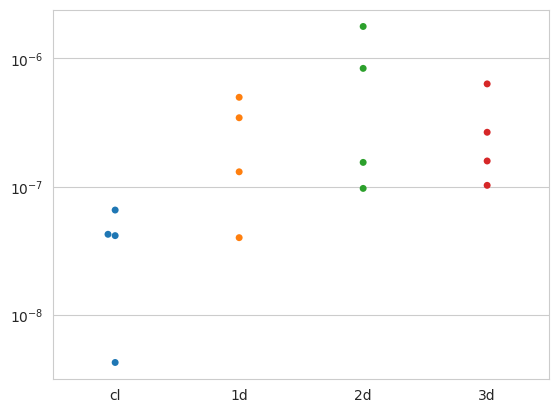

In [40]:
import seaborn as sns
data = pd.DataFrame(1 - np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)
plt.yscale('log')

In [45]:
df_mini.loc[df_mini.Model=='1d-copyweight-cube-girg'].sort_values('Nodes')

,Graph,Model,Type,Nodes,Edges,Info,alpha
0,socfb-Caltech36,1d-copyweight-cube-girg,socfb,756,16766,"{'tau': '7.3017225936374555', 'alpha': '1.2171...",1.217193
1,socfb-Reed98,1d-copyweight-cube-girg,socfb,955,18329,"{'tau': '4.381732472502371', 'alpha': '1.07671...",1.076716
4,socfb-Haverford76,1d-copyweight-cube-girg,socfb,1440,57770,"{'tau': '6.5461700448727616', 'alpha': '1.0592...",1.059252
3,socfb-Simmons81,1d-copyweight-cube-girg,socfb,1497,33125,"{'tau': '4.739342146243066', 'alpha': '1.16300...",1.163002
6,socfb-Swarthmore42,1d-copyweight-cube-girg,socfb,1657,61392,"{'tau': '5.598783007439967', 'alpha': '1.04234...",1.042345
...,...,...,...,...,...,...,...
162,socfb-MSU24,1d-copyweight-cube-girg,socfb,32345,1115806,"{'tau': '5.112979295133962', 'alpha': '1.02195...",1.021956
167,socfb-UF,1d-copyweight-cube-girg,socfb,35095,1454892,"{'tau': '4.918454781144023', 'alpha': '1.05073...",1.050731
165,socfb-UF21,1d-copyweight-cube-girg,socfb,35101,1448482,"{'tau': '4.918454781144023', 'alpha': '1.04652...",1.046521
117,socfb-Texas84,1d-copyweight-cube-girg,socfb,36354,1576966,"{'tau': '4.774843344808111', 'alpha': '1.01010...",1.010101


<AxesSubplot: >

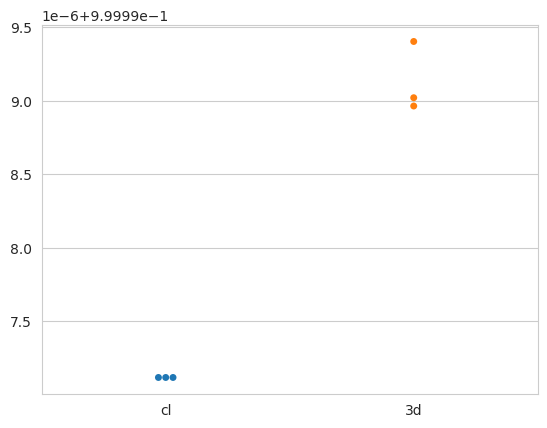

In [45]:
sns.swarmplot(data.loc[:, ['cl', '3d']])

In [61]:
outs[-1] = outs[-1] + [outs[-1][0]]

<AxesSubplot: >

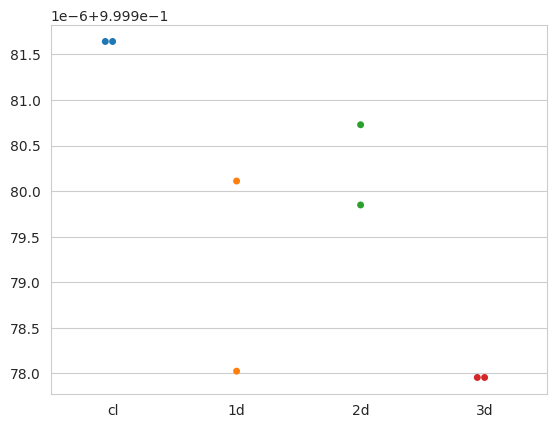

In [62]:
# outs = np.array(outs)
import seaborn as sns
# data = pd.DataFrame(np.array(outs).T, columns=['cl', '1d', '2d', '3d', '4d'])
data = pd.DataFrame(np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)

In [64]:
from feature_extractor import FeatureExtractor
fe = FeatureExtractor([])
info, g_out = fe.fit_ndgirg_non_c_implementation(1, utils.LCC, cube=True, copy_weights=True, verbose=True)(g)

calling goal_f(alpha=100.0)
starting search at const=0.601171875; depth=6: For alpha=100.0


../benji_girgs/generation.py:647: RuntimeWarning: divide by zero encountered in divide
  """
../benji_girgs/generation.py:648: RuntimeWarning: divide by zero encountered in divide
  n = g_true.numberOfNodes()
../benji_girgs/generation.py:138: RuntimeWarning: overflow encountered in multiply
  p_uv = np.minimum(const * p_uv, 1)
../benji_girgs/generation.py:647: RuntimeWarning: overflow encountered in power
  """
../benji_girgs/generation.py:647: RuntimeWarning: overflow encountered in multiply
  """
../benji_girgs/generation.py:648: RuntimeWarning: overflow encountered in power
  n = g_true.numberOfNodes()
../benji_girgs/generation.py:648: RuntimeWarning: overflow encountered in multiply
  n = g_true.numberOfNodes()


a: 0.3005859375, m: 0.601171875, b: 1.20234375, f_a: 23.313929313929314, f_m: 44.525987525987524, f_b: 87.66943866943868, goal: 39.11018711018711
a: 0.3005859375, m: 0.45087890625000004, b: 0.601171875, f_a: 23.313929313929314, f_m: 33.84199584199584, f_b: 44.525987525987524, goal: 39.11018711018711
a: 0.45087890625000004, m: 0.5260253906250001, b: 0.601171875, f_a: 33.84199584199584, f_m: 40.07276507276507, f_b: 44.525987525987524, goal: 39.11018711018711
a: 0.45087890625000004, m: 0.48845214843750007, b: 0.5260253906250001, f_a: 33.84199584199584, f_m: 36.84407484407485, f_b: 40.07276507276507, goal: 39.11018711018711
a: 0.48845214843750007, m: 0.5072387695312501, b: 0.5260253906250001, f_a: 36.84407484407485, f_m: 37.82744282744283, f_b: 40.07276507276507, goal: 39.11018711018711
calling goal_f(alpha=2.0)
starting search at const=0.3114983948594278; depth=6: For alpha=2.0
a: 0.1557491974297139, m: 0.3114983948594278, b: 0.6229967897188556, f_a: 23.62162162162162, f_m: 44.62577962577

In [75]:
temp = [x.split('=') for x in info.split('|')]
{a: eval(b) for a, b in temp}

{'tau': 4.381732472502371,
 'alpha': 1.0635646032405484,
 'const': 0.12118153114275264,
 'target_lcc': 0.31836022727227925,
 'fit_lcc': 0.31602744973881414,
 'fitting_time': 13.056175947189331,
 'hist': [(2.0, 0.6173220492572326),
  (1.342281879194631, 0.4376142442960426),
  (1.1527377521613833, 0.3591851552021037),
  (1.0767160161507403, 0.32872175111887136),
  (1.0423452768729642, 0.2887513543551115),
  (1.0592519033432637, 0.30417333385864403),
  (1.0679125646587686, 0.32066542408317),
  (1.0635646032405484, 0.3165918680902781)]}

In [8]:
import os
os.environ['DATA_PATH'] = '../../FE_FB_copyweights_cube/'

df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')

df.Info = df.Info.apply(lambda temp: {key: var for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: float(x['alpha']) if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

df_mini = df.loc[:, ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'Info', 'alpha']]


In [83]:
df_mini

,Graph,Model,Type,Nodes,Edges,Info
0,socfb-Caltech36,1d-copyweight-cube-girg,socfb,756,16766,"{'tau': '7.3017225936374555', 'alpha': '1.2171..."
1,socfb-Reed98,1d-copyweight-cube-girg,socfb,955,18329,"{'tau': '4.381732472502371', 'alpha': '1.07671..."
2,socfb-Caltech36,2d-copyweight-cube-girg,socfb,757,16863,"{'tau': '7.3017225936374555', 'alpha': '1.1949..."
3,socfb-Simmons81,1d-copyweight-cube-girg,socfb,1497,33125,"{'tau': '4.739342146243066', 'alpha': '1.16300..."
4,socfb-Haverford76,1d-copyweight-cube-girg,socfb,1440,57770,"{'tau': '6.5461700448727616', 'alpha': '1.0592..."
...,...,...,...,...,...,...
263,socfb-UConn91,2d-copyweight-cube-girg,socfb,17107,605172,"{'tau': '5.145909409369553', 'alpha': '1.08117..."
264,socfb-UMass92,3d-copyweight-cube-girg,socfb,16413,534207,"{'tau': '4.541851675093422', 'alpha': '1.08566..."
265,socfb-UC33,3d-copyweight-cube-girg,socfb,16688,504749,"{'tau': '4.812191215002762', 'alpha': '1.09476..."
266,socfb-UF21,3d-copyweight-cube-girg,socfb,34928,1467958,"{'tau': '4.918454781144023', 'alpha': '1.10870..."


In [81]:
df_mini.Info[1]

'tau=4.381732472502371|alpha=1.0767160161507403|const=0.11990006024738019|target_lcc=0.31836022727227925|fit_lcc=0.3122201463706791|fitting_time=19.216066598892212|hist=[(2.0, 0.601654218661161), (1.342281879194631, 0.4500069992020386), (1.1527377521613833, 0.34883587407667926), (1.0767160161507403, 0.3162678611423067), (1.1134307585247043, 0.3359806839067379), (1.0947656517276771, 0.32100278073945815), (1.0856658184902461, 0.33016551433112173), (1.0767160161507403, 0.3162678611423067)]'

In [68]:
{a: eval(b) for x in info.split('|') for a, b in x.split('=')}

ValueError: too many values to unpack (expected 2)

In [69]:
[(a, b) for a in range(3) for b in range(5)]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4)]

In [51]:
get_rw_kernel([g_out])

ValueError: Unsupported input type. For more information check the documentation, concerning valid input types for graph type object.

In [34]:
nk.overview(g)

Network Properties:
nodes, edges			1000, 22427
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.044899
clustering coefficient		0.257323
min/max/avg degree		7, 772, 44.854000
degree assortativity		-0.148806
number of connected components	1
size of largest component	1000 (100.00 %)


<AxesSubplot: >

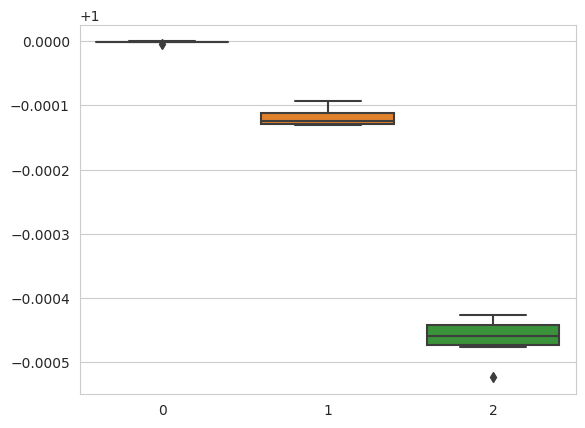

In [32]:
outs = np.array(outs)
import seaborn as sns
sns.boxplot(data=outs.T)

In [25]:
outs = np.array(outs)

<AxesSubplot: >

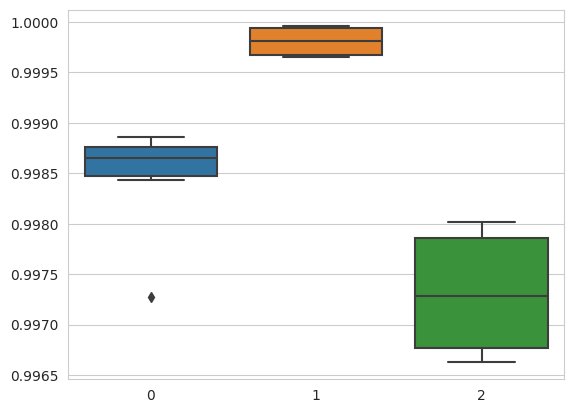

In [26]:
import seaborn as sns
sns.boxplot(data=outs.T)

In [25]:
print(f'MC: {MC.ll}')
print(f'MC_dm: {MC_dm.ll}')
print(f'MC2: {MC2.ll}')
print(f'MC_dm2: {MC_dm2.ll}')
print(f'MC_pickle: {MC_pickle.ll}')
print(f'MC_pickle2: {MC_pickle2.ll}')
print(f'chung_lu_ll: {chung_lu_ll}')

MC: -137860.2683948932
MC_dm: -131448.12255962266
MC2: -139035.93735796952
MC_dm2: -129457.22462367786
MC_pickle: -125363.74972813886
MC_pickle2: -124276.07541961469
chung_lu_ll: -128476.06068462234


In [31]:
_, A_MC = MC.MC_to_g_A()
_, A_MC_dm = MC_dm.MC_to_g_A()
_, A_MC_pickle = MC_pickle.MC_to_g_A()
_, A_MC2 = MC2.MC_to_g_A()
_, A_MC_dm2 = MC_dm2.MC_to_g_A()
_, A_MC_pickle2 = MC_pickle2.MC_to_g_A()

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:597: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:598: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


In [32]:
g_MC = grakel.Graph(A_MC)
g_MC_dm = grakel.Graph(A_MC_dm)
g_MC_pickle = grakel.Graph(A_MC_pickle)
g_MC2 = grakel.Graph(A_MC2)
g_MC_dm2 = grakel.Graph(A_MC_dm2)
g_MC_pickle2 = grakel.Graph(A_MC_pickle2)

gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)
g_CL = grakel.Graph(A_cl)

In [17]:
from grakel import GraphKernel
# sp_kernel = GraphKernel(kernel="shortest_path", with_labels=False)

sp_kernel = grakel.kernels.ShortestPath(with_labels=False)
sp_kernel_normalised = grakel.kernels.ShortestPath(with_labels=False, normalize=True)

rw_kernel = grakel.kernels.RandomWalk(normalize=False)
gs_kernel = grakel.kernels.GraphletSampling(n_jobs=5, normalize=True)

In [24]:
sp_kernel = grakel.kernels.ShortestPath(with_labels=False, normalize=True)
sp_kernel.fit_transform([g_gk])
sp_kernel.transform([g_MC_gk])

array([[1.]])

array([[0.99811444]])

In [27]:
def get_sp_kernel(g1, g2):
    sp_kernel = grakel.kernels.ShortestPath(with_labels=False, normalize=True)
    sp_kernel.fit_transform([g1])
    return sp_kernel.transform([g2])[0, 0]

get_sp_kernel(g_gk, g_MC_gk)

0.9981144435698038

In [36]:
# def get_rw_kernel(g1, g2):
#     rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=0.01)
#     rw_kernel.fit_transform([g1])
#     return rw_kernel.transform([g2])[0, 0]

rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=0.01)
rw_kernel.fit_transform([g_gk])

def get_rw_kernel(g1):
    return rw_kernel.transform([g1])[0, 0]

array([[1.]])

In [29]:
sp_kernel_normalised = grakel.kernels.ShortestPath(with_labels=False, normalize=True)
rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=0.01)

array([[1.        , 3.76081314],
       [3.76081314, 1.        ]])

array([[1.        , 2.40027707],
       [2.40027707, 1.        ]])

array([[1.        , 1.86030097],
       [1.86030097, 1.        ]])

In [33]:
rw_kernel.fit_transform([g_gk, g_CL])

array([[1.        , 1.86030097],
       [1.86030097, 1.        ]])

In [34]:
rw_kernel.fit_transform([g_gk, g_MC])
rw_kernel.fit_transform([g_gk, g_MC_dm])
rw_kernel.fit_transform([g_gk, g_MC_pickle])

array([[1.        , 3.26718743],
       [3.26718743, 1.        ]])

array([[1.        , 2.38644082],
       [2.38644082, 1.        ]])

array([[1.        , 2.80388135],
       [2.80388135, 1.        ]])

In [35]:
rw_kernel.fit_transform([g_gk, g_MC2])
rw_kernel.fit_transform([g_gk, g_MC_dm2])
rw_kernel.fit_transform([g_gk, g_MC_pickle2])

array([[ 1.        , 11.11950001],
       [11.11950001,  1.        ]])

array([[1.        , 2.23600994],
       [2.23600994, 1.        ]])

array([[1.        , 2.80352438],
       [2.80352438, 1.        ]])

In [39]:
for d in [1, 2, 3, 4, 5]:
    print(d)
    _, _, _, _, _, MC_temp = mcmc.g_initialised_mcmc(g, 1.2, 1.0, pts_d=2, diffmap_init=False, graph_name='Reed98', failure_prob=0.3, cl_mixin_prob=0.5)
    _, A_MC_temp = MC_temp.MC_to_g_A()
    g_MC_temp = grakel.Graph(A_MC_temp)
    print(get_rw_kernel(g_MC_temp))


1
calibrating const
const: 1.0, expected_num_edges: 48068.583489804994
const: 0.39135748620489086, expected_num_edges: 30370.497031774434
const: 0.24241345219947688, expected_num_edges: 24268.47856832681
const: 0.1879096726206915, expected_num_edges: 21698.33377165328
const: 0.16291374252701923, expected_num_edges: 20441.07688473585
const: 0.14993013047697315, expected_num_edges: 19763.409983407142
const: 0.14271249834420413, expected_num_edges: 19378.652792121684
4.246706290743519
2
calibrating const
const: 1.0, expected_num_edges: 47559.57528476552
const: 0.3955460049288106, expected_num_edges: 30107.578105788325
const: 0.2471474596387484, expected_num_edges: 24160.48401913088
const: 0.19243563196178817, expected_num_edges: 21655.516112034482
const: 0.16716752857501208, expected_num_edges: 20417.368355170074
const: 0.15402354959995684, expected_num_edges: 19750.513344559335
const: 0.14670459266176789, expected_num_edges: 19372.096435222473
3.012945721995179
3
calibrating const
const:

KeyboardInterrupt: 

In [30]:
rw_kernel.fit_transform([g_gk, g_MC_pickle])

array([[1.        , 3.12473866],
       [3.12473866, 1.        ]])

In [29]:
help(grakel.kernels.RandomWalk)

Help on class RandomWalk in module grakel.kernels.random_walk:

class RandomWalk(grakel.kernels.kernel.Kernel)
 |  RandomWalk(n_jobs=None, normalize=False, verbose=False, lamda=0.1, method_type='fast', kernel_type='geometric', p=None)
 |  
 |  The random walk kernel class.
 |  
 |  See :cite:`kashima2003marginalized`, :cite:`gartner2003graph`
 |  and :cite:`vishwanathan2006fast`.
 |  
 |  Parameters
 |  ----------
 |  lambda : float
 |      A lambda factor concerning summation.
 |  
 |  method_type : str, valid_values={"baseline", "fast"}
 |      The method to use for calculating random walk kernel:
 |          + "baseline" *Complexity*: :math:`O(|V|^6)`
 |            (see :cite:`kashima2003marginalized`, :cite:`gartner2003graph`)
 |          + "fast" *Complexity*: :math:`O((|E|+|V|)|V||M|)`
 |            (see :cite:`vishwanathan2006fast`)
 |  
 |  kernel_type : str, valid_values={"geometric", "exponential"}
 |      Defines how inner summation will be applied.
 |  
 |  p : int or None


In [13]:
K = sp_kernel_normalised.fit_transform([g_gk, g_MC_gk])
print(K)
K1 = sp_kernel_normalised.fit_transform([g_gk, g_MC_dm_gk])
print(K1)
K2 = sp_kernel_normalised.fit_transform([g_gk, g_CL_gk])
print(K2)

[[1.         0.99811444]
 [0.99811444 1.        ]]
[[1.         0.99225746]
 [0.99225746 1.        ]]
[[1.         0.98077829]
 [0.98077829 1.        ]]


In [15]:
K = sp_kernel_normalised.fit_transform([g_gk, g_MC_gk])
print(K)
K1 = sp_kernel_normalised.fit_transform([g_gk, g_MC_dm_gk])
print(K1)
K2 = sp_kernel_normalised.fit_transform([g_gk, g_CL_gk])
print(K2)

[[1.         0.99811444]
 [0.99811444 1.        ]]
[[1.         0.99225746]
 [0.99225746 1.        ]]
[[1.         0.98077829]
 [0.98077829 1.        ]]


In [18]:
K = rw_kernel.fit_transform([g_gk, g_MC_gk])
print(K)
K1 = rw_kernel.fit_transform([g_gk, g_MC_dm_gk])
print(K1)
K2 = rw_kernel.fit_transform([g_gk, g_CL_gk])
print(K2)

[[ 103194.75668132 -181671.67808457]
 [-181671.67808457  -22338.72470025]]
[[ 103194.75668132 -317003.15497867]
 [-317003.15497867 -566440.74507411]]
[[ 103194.75668132  102674.57379999]
 [ 102674.57379999 -561337.38579245]]


In [19]:
K, K1

(array([[1.        , 0.99899907],
        [0.99899907, 1.        ]]),
 array([[1.        , 0.98077829],
        [0.98077829, 1.        ]]))

In [36]:
K, K1

(array([[ 1., nan],
        [nan, -1.]]),
 array([[ 1., nan],
        [nan, -1.]]))

In [37]:
nk.overview(g)

Network Properties:
nodes, edges			962, 18812
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.040697
clustering coefficient		0.318360
min/max/avg degree		1, 313, 39.110187
degree assortativity		0.024395
number of connected components	1
size of largest component	962 (100.00 %)


In [28]:
K = sp_kernel.fit_transform([g_temp_gk, g_gk])
K2 = sp_kernel_normalised.fit_transform([g_temp_gk, g_gk])

In [29]:
K
K2

array([[3.67635764e+11, 3.63211829e+11],
       [3.63211829e+11, 3.59653652e+11]])

array([[1.        , 0.99886977],
       [0.99886977, 1.        ]])

In [7]:
import pickle

name='socfb-Swarthmore42'

gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

pickle_path = '../../MCMC_run_fp_0p3_cl_0p5_v2/pickles/'
with open(pickle_path + name + '-1d' + '.pkl', 'rb') as file:
    MC1 = pickle.load(file)

MC1.calibrate_const()

with open(pickle_path + name + '-2d' + '.pkl', 'rb') as file:
    MC2 = pickle.load(file)

MC2.calibrate_const()

'/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne'

Network Properties:
nodes, edges			1657, 61049
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.044496
clustering coefficient		0.296897
min/max/avg degree		1, 577, 73.686180
degree assortativity		0.061163
number of connected components	1
size of largest component	1657 (100.00 %)


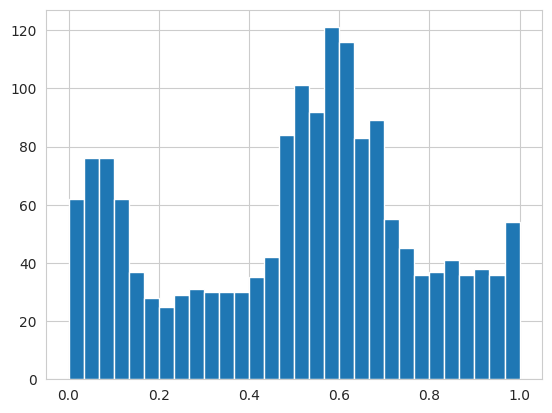

In [8]:
_ = plt.hist(MC1.pts[:, 0], bins=30)

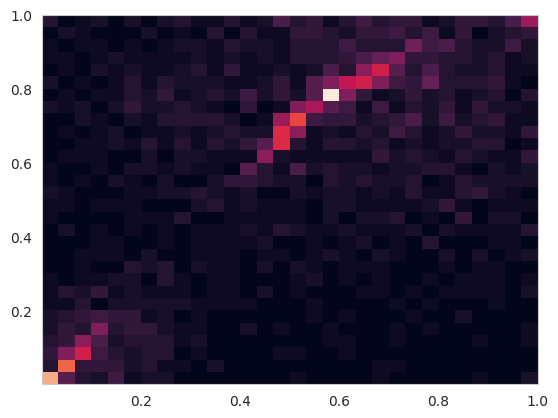

In [9]:
_ = plt.hist2d(MC2.pts[:, 0], MC2.pts[:, 1], bins=30)

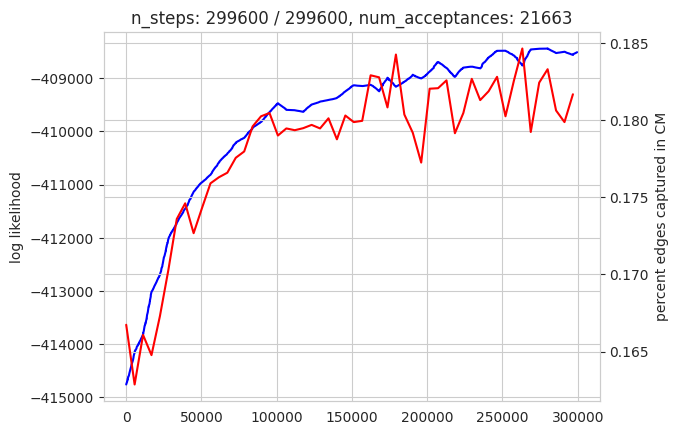

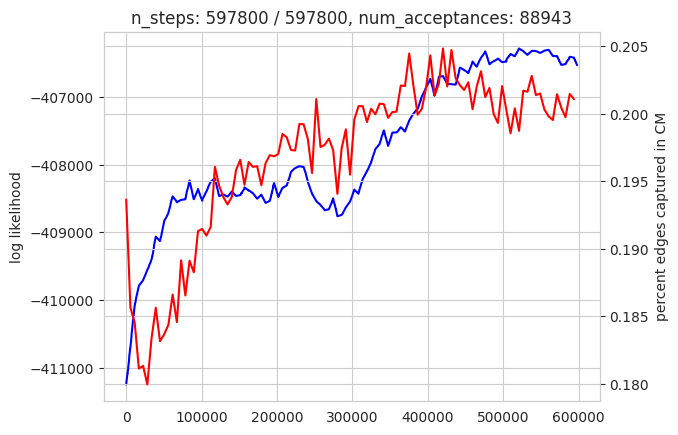

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC1.plot_ll(MC1.num_steps, CM=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC2.plot_ll(MC2.num_steps, CM=True)


In [19]:
importlib.reload(mcmc)
importlib.reload(generation)

<module 'benji_girgs.mcmc' from '../benji_girgs/mcmc.py'>

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

In [20]:
alpha = MC1.alpha
const=MC1.const
lls = []
for _ in range(2):
    print(_)
    i = 0
    graph_name = name
    _, _, _, _, pts, MC_prior = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                    diffmap_init=False, graph_name=graph_name + f'-{i+1}d',
                                                                            failure_prob=0.3, cl_mixin_prob=0.5)
    lls.append(MC_prior.ll)

0
calibrating const
const: 0.11027144113091161, expected_num_edges: 51782.386914062554
const: 0.13000484548488095, expected_num_edges: 54751.59647450031
const: 0.14495770576667794, expected_num_edges: 56924.876490861854
const: 0.15545967817375123, expected_num_edges: 58415.308628834544
const: 0.1624686767150731, expected_num_edges: 59394.12274976218
const: 0.16699548348524454, expected_num_edges: 60020.396973969546
const: 0.16985737824613453, expected_num_edges: 60413.84415580018
1
calibrating const
const: 0.11027144113091161, expected_num_edges: 51797.964067984285
const: 0.12996574924770007, expected_num_edges: 54770.817172966934
const: 0.14486325812460107, expected_num_edges: 56945.072557326566
const: 0.1553032887322387, expected_num_edges: 58434.39215167722
const: 0.16225223065903507, expected_num_edges: 59410.73710529938
const: 0.16672636819750694, expected_num_edges: 60033.708928759945
const: 0.16954604727434167, expected_num_edges: 60424.10155801656


In [21]:
lls

[-450449.67519169167, -449984.8583343092]

In [23]:
chung_lu_ll, er_ll, A_cl, probs_cl = generation.chung_lu_get_stuff(MC_prior.g)
print(chung_lu_ll, er_ll)

-423188.2874977369 -1901990.3182789893


In [22]:
MC_prior.outs[0]

(array([[  12000,  110098],
        [ 107110, 2516441]]),
 0)

In [23]:
MC1.outs[0]

(array([[  20358,  101740],
        [ 101456, 2522095]]),
 0)

In [121]:
alpha = MC2.alpha
const = MC2.const
i=1

# _, _, _, _, _, MC = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                                 diffmap_init=False, graph_name=name + f'-{i+1}d',                                                       failure_prob=0.3)

_, _, _, _, _, MC_dm = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                                 diffmap_init=True, graph_name=name + f'-{i+1}d',                                                       failure_prob=0.3)

calibrating const
const: 0.04532197721532701, expected_num_edges: 59946.8871166855
const: 0.014222540591893745, expected_num_edges: 32130.768001902805
const: 0.008327047570069298, expected_num_edges: 23147.950971812304
const: 0.006767269339687878, expected_num_edges: 20265.172586641856
const: 0.006282002794396346, expected_num_edges: 19308.27407722848
const: 0.006120538588560746, expected_num_edges: 18982.81673054486
const: 0.006065462969082773, expected_num_edges: 18871.068299147813


In [118]:
MC_temp1.calculate_ll()
MC_temp2.calculate_ll()

(-169331.2210693177, 18810.98512856123)

(-165513.67828647894, 18832.78446100949)

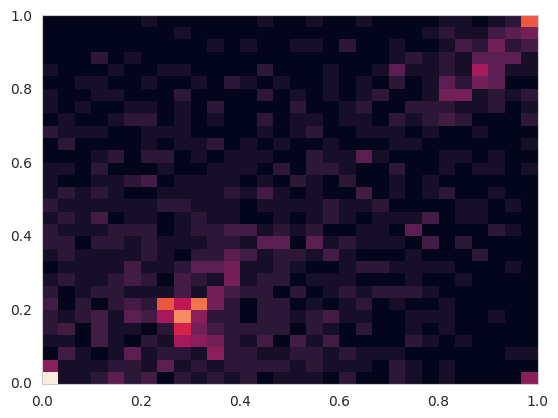

In [129]:
%matplotlib inline
_ = plt.hist2d(MC_dm.pts[:, 0], MC_dm.pts[:, 1], bins=30)

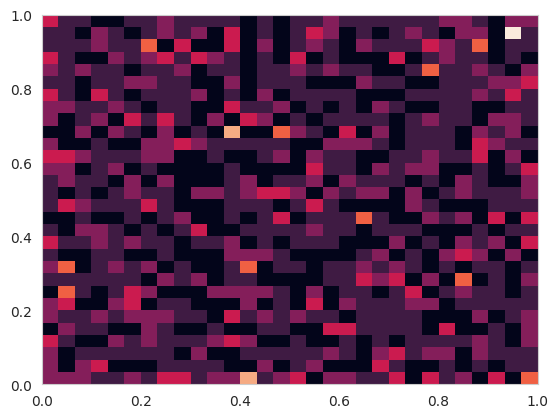

In [138]:
%matplotlib inline
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [143]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [144]:
MC.plot_ll(MC.num_steps, CM=True)

In [133]:
MC.run_pool(800000, pool_size=15, jobs_per_worker=200, plot_every=20000)

801000it [05:14, 2547.45it/s]                            


In [145]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [146]:
MC_dm.plot_ll(MC_dm.num_steps, CM=True)

In [147]:
MC_dm.g.numberOfNodes()

962

In [148]:
MC_dm.pts.shape

(962, 2)

In [127]:
MC_dm.run_pool(100000, pool_size=15, jobs_per_worker=80, plot_every=5000)

100800it [01:11, 1403.02it/s]                           


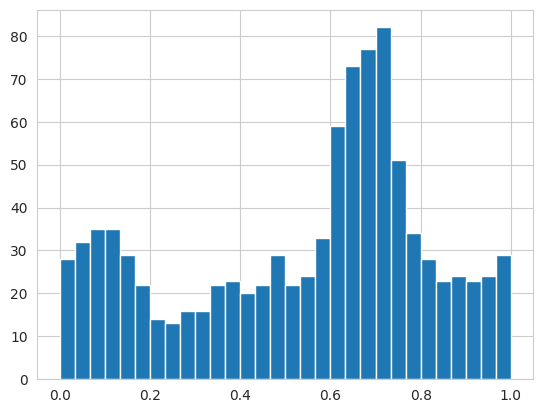

In [22]:
%matplotlib inline
_ = plt.hist(MC.pts[:, 0], bins=30)

In [78]:
fe = feature_extractor.FeatureExtractor([])
cl = fe.fit_chung_lu(g)

weights = utils.graph_degrees_to_weights(g)
c, probs_cl = generation.chung_lu_fit_c(g, weights)
chung_lu_ll = generation.g_probs_to_ll(g, probs_cl)
print(f'chunglu LL: {chung_lu_ll}')
er_ll = generation.ER_ll(g)
print(f'er LL: {er_ll}')

g_cl = fe.fit_chung_lu(g)
gnx = nk.nxadapter.nk2nx(cl)
A_cl = nx.linalg.adjacency_matrix(gnx).todense()
out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_cl)
print(out)
print(percent_edges_captured, percent_fake_edges_wrong)

chunglu LL: -128476.06068462232
er LL: -640802.091778406
[[  1480  36144]
 [ 36346 851474]]
0.03933659366361897 0.9608734732723524


In [26]:
MC.calculate_ll()

(-143216.9045256718, 18811.572108576074)

In [89]:
self = MC
ll = 0
expected_num_edges = 0
P = np.zeros_like(A, dtype=np.float64)
L = np.zeros_like(A, dtype=np.float64)

for u_index in range(self.n):
    eps = 1e-7
    p_u_to_vs = generation.get_probs_u(self.weights, self.pts, self.alpha, self.const_in, u_index)
    p_u_to_vs *= (1 - self.failure_prob)
    ##### Mix in CL
    p_u_to_vs = 0.5*p_u_to_vs + 0.5*probs_cl[u_index]
    #####
    expected_num_edges += p_u_to_vs.sum()
    p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)
    P[:, u_index] = p_u_to_vs
    u_ll = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
    ###
    out = 0
    n = g.numberOfNodes()
    assert n == len(p_u_to_vs)
    mask = np.ones(n, dtype=bool)
    for nhb in g.iterNeighbors(u_index):
        mask[nhb] = False
        out += np.log(p_u_to_vs[nhb])
    L[~mask, u_index] = np.log(p_u_to_vs[~mask])
    mask[u_index] = False
    out += np.log(1 - p_u_to_vs[mask]).sum()
    L[mask, u_index] = np.log(1 - p_u_to_vs[mask])
    ll += u_ll

print(ll, expected_num_edges/2)

-126121.13094076623 18823.635308670997


In [84]:
g.numberOfEdges()

18812

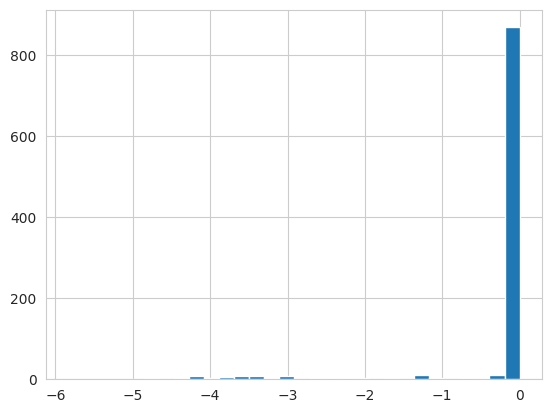

In [59]:
%matplotlib inline
_ = plt.hist(L[:, 0], bins=30)

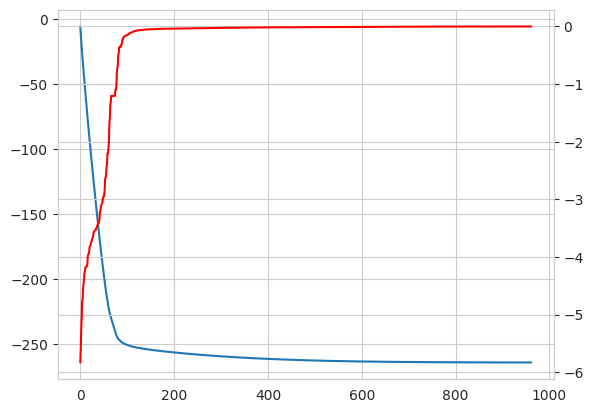

In [66]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(np.cumsum(sorted(L[:, 0])))
ax2.plot(sorted(L[:,0]), color='r')

In [67]:
mask

73

In [79]:
probs_cl.shape

(962, 962)

In [80]:
u_index = 0
eps = 1e-7
# p_u_to_vs = generation.get_probs_u(self.weights, self.pts, self.alpha, self.const_in, u_index)
p_u_to_vs = probs_cl[u_index]
p_u_to_vs *= (1 - self.failure_prob)
expected_num_edges += p_u_to_vs.sum()
p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)
# P[:, u_index] = p_u_to_vs
u_ll = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
###
out = 0
n = g.numberOfNodes()
assert n == len(p_u_to_vs)
mask = np.ones(n, dtype=bool)
for nhb in g.iterNeighbors(u_index):
    mask[nhb] = False
    out += np.log(p_u_to_vs[nhb])
# L[~mask, u_index] = np.log(p_u_to_vs[~mask])
mask[u_index] = False
out += np.log(1 - p_u_to_vs[mask]).sum()
# L[mask, u_index] = np.log(1 - p_u_to_vs[mask])
# ll += u_ll

<Figure size 640x480 with 0 Axes>

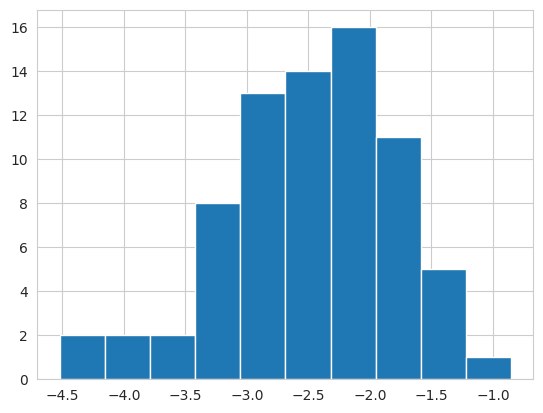

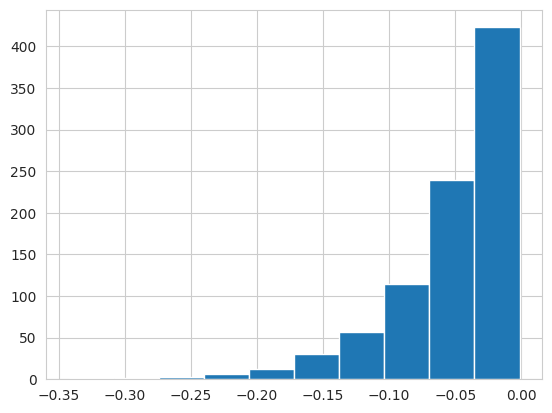

In [81]:
_ = plt.hist(np.log(p_u_to_vs[~mask]))
plt.figure()
_ = plt.hist(np.log(1 - p_u_to_vs[mask]))

<Figure size 640x480 with 0 Axes>

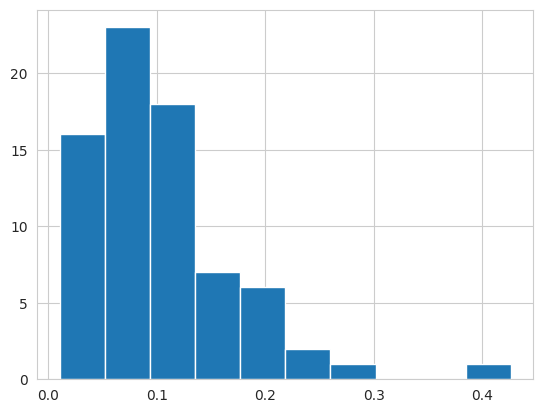

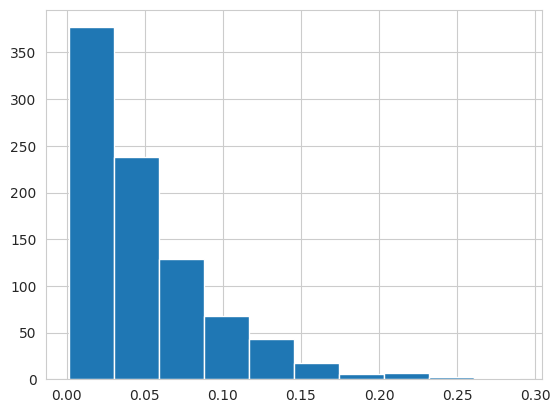

In [82]:
_ = plt.hist(p_u_to_vs[~mask])
plt.figure()
_ = plt.hist(p_u_to_vs[mask])

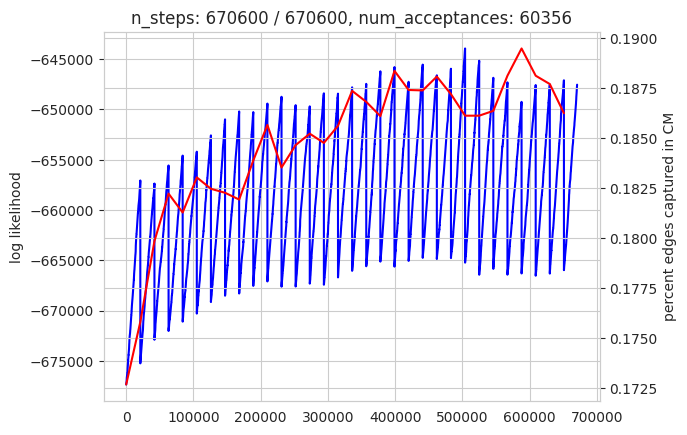

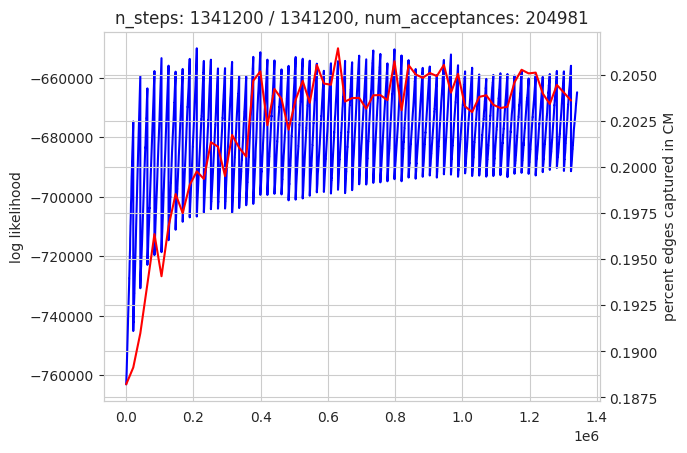

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC1.plot_ll(MC1.num_steps, CM=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC2.plot_ll(MC2.num_steps, CM=True)

In [15]:
g_degs = [g.degree(i) for i in range(g.numberOfNodes())]

argsorted = np.argsort(g_degs)[::-1]
fe = feature_extractor.FeatureExtractor([])

cl = fe.fit_chung_lu(g)
gnx = nk.nxadapter.nk2nx(cl)
A_cl = nx.linalg.adjacency_matrix(gnx).todense()
# A_cl = A_cl[:, argsorted][argsorted, :]

out, p1, p2 = mcmc.CM(MC1.A[:, argsorted][argsorted, :], A_cl)
print(p1, p2)
print(out)

weights = utils.graph_degrees_to_weights(g)
c, probs = generation.chung_lu_fit_c(g, weights)
chung_lu_ll = generation.g_probs_to_ll(g, probs)
print(f'chunglu LL: {chung_lu_ll}')
er_ll = generation.ER_ll(g)
print(f'er LL: {er_ll}')

0.09493810057831431 0.9050671181521345
[[  17270  164638]
 [ 164648 4648669]]
chunglu LL: -670400.0038853943
er LL: -3460876.941063832


In [16]:
self = MC1
g_out, A_out, out, percent_edges_captured, percent_fake_edges_wrong = self.get_CM(self.A)
print(out)
print(percent_edges_captured, percent_fake_edges_wrong)

ll, expected_num_edges = MC1.calculate_ll()
ll, expected_num_edges

../benji_girgs/generation.py:125: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:586: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:587: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


[[  34192  147716]
 [ 145568 4667749]]
0.18796314620577434 0.8097908322207388


In [20]:
ll, expected_num_edges = MC1.calculate_ll()
ll, expected_num_edges

(-666249.1723944361, 91118.34111135668)

In [25]:
ll - n * np.log(n)

-683485.4845876876